In [505]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px 
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
import warnings 
warnings.filterwarnings('ignore')

In [6]:
#Problem Statement:
#The primary problem is the high rate of customer churn at ConnectTel. 
#The objective is to build a predictive model that identifies customers at risk of churning so that targeted interventions can be implemented to retain them
#This involves leveraging customer data to predict churn and subsequently using these predictions to inform business strategies for customer retention.

In [507]:
#Loaded data
ConTel_df = pd.read_csv("ConTel_Customer_Churn.csv")

In [509]:
ConTel_df 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

#Data Cleaning and Features

In [511]:
ConTel_df.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [11]:
#Observation on Numerical columns
#   - SeniorCitizen are represented by 1 
#   -tenure: ranges from 1 to 72 months, average around 32
#   - MonthlyCharges: range from 18 to 118, average around 64
#   - TotalCharges: large range, likely due to varying tenure lengths


In [513]:
ConTel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [515]:
# Drop customerID

ConTel_df = ConTel_df.drop('customerID', axis=1)
ConTel_df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [517]:
ConTel_df.duplicated().sum()

22

In [519]:
ConTel_df.drop_duplicates(inplace=True)

In [521]:
ConTel_df.duplicated().sum()

0

In [523]:
# Convert 'TotalCharges' column to numeric type
ConTel_df['TotalCharges'] = pd.to_numeric(ConTel_df['TotalCharges'], errors='coerce')

#Filling missing values
median_total_charges = ConTel_df['TotalCharges'].median()
ConTel_df['TotalCharges'].fillna(median_total_charges, inplace=True)
print(ConTel_df['TotalCharges'].dtype)  
print(ConTel_df['TotalCharges'].isnull().sum())

float64
0


In [18]:
#Observation
# Missing values in 'TotalCharges' have been filled with the median value.
# The data type of 'TotalCharges' remains float64.
# Missing values in 'TotalCharges' have been taken care of.


<Axes: >

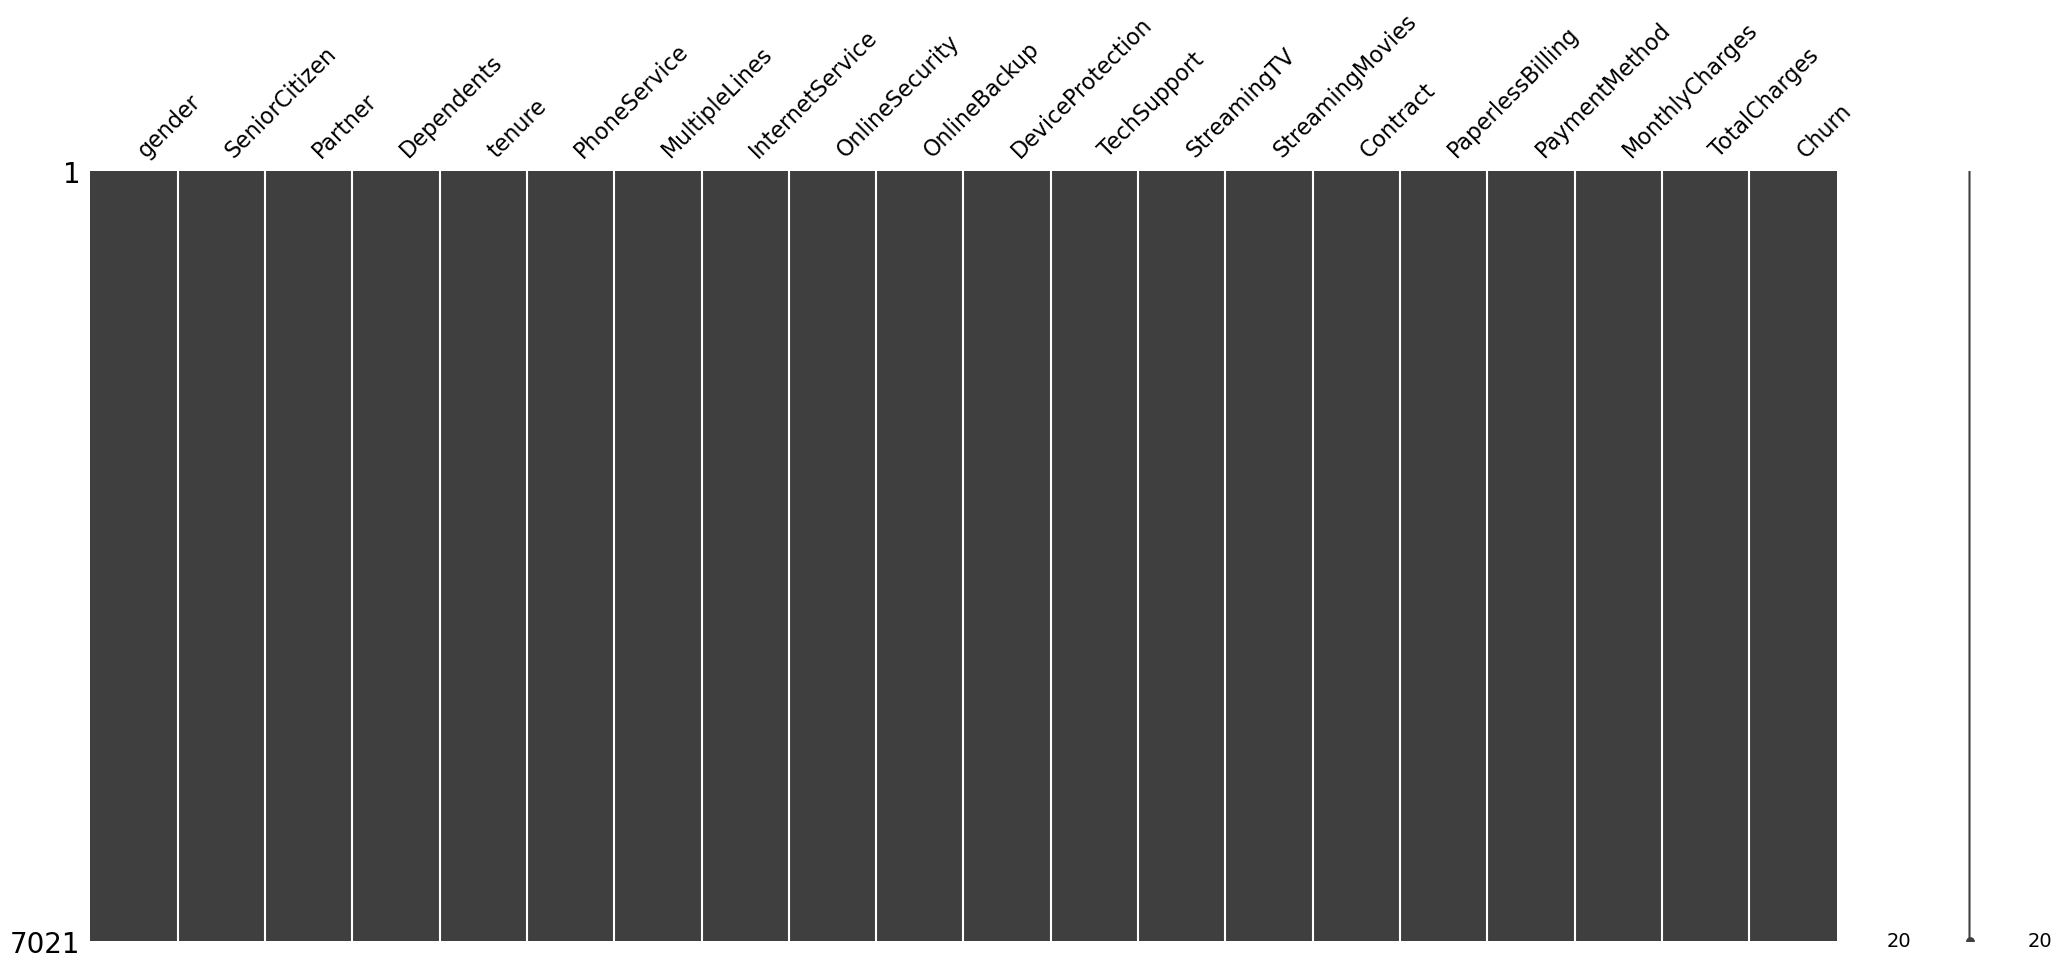

In [525]:
#Checking for Missing Values
!pip install missingno
msno.matrix(ConTel_df)

In [20]:
#Observation
#matrix plot does not reveal any missing values in the dataset
#All columns appear to be fully populated
#sparkline on the right side of the plot provides a visual summary of the completeness of each column.
# The height of the sparkline corresponds to the proportion of non-missing values in that column.


In [527]:
# Total Customers,Churn & Revenue

# Total number of customers
total_customers = ConTel_df.shape[0]
print("Total Customers:", total_customers)

# Total customers churned
total_churned = ConTel_df['Churn'].value_counts()['Yes']
print("Total Customers Churned:", total_churned)

# Revenue per customer
total_revenue = ConTel_df['MonthlyCharges'].sum()
print("Total Revenue:", total_revenue)


Total Customers: 7021
Total Customers Churned: 1857
Total Revenue: 455325.15


In [531]:
# % of each categorical columns

# Calculate percentage of each category for relevant columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
  print(f"---- {col} ----")
  percentages = ConTel_df[col].value_counts(normalize=True) * 100
  print(percentages)

---- gender ----
gender
Male      50.434411
Female    49.565589
Name: proportion, dtype: float64
---- SeniorCitizen ----
SeniorCitizen
0    83.748754
1    16.251246
Name: proportion, dtype: float64
---- Partner ----
Partner
No     51.545364
Yes    48.454636
Name: proportion, dtype: float64
---- Dependents ----
Dependents
No     69.947301
Yes    30.052699
Name: proportion, dtype: float64
---- PhoneService ----
PhoneService
Yes    90.286284
No      9.713716
Name: proportion, dtype: float64
---- MultipleLines ----
MultipleLines
No                  47.970375
Yes                 42.315909
No phone service     9.713716
Name: proportion, dtype: float64
---- InternetService ----
InternetService
Fiber optic    44.010825
DSL            34.453782
No             21.535394
Name: proportion, dtype: float64
---- OnlineSecurity ----
OnlineSecurity
No                     49.708019
Yes                    28.756587
No internet service    21.535394
Name: proportion, dtype: float64
---- OnlineBackup ----
O

In [533]:
ConTel_df.tail()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No

In [535]:
# Unique values and counts
col=[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for i in col:
    print(i)
    print(ConTel_df[i].unique())
    print(ConTel_df[i].nunique())
    print()

gender
['Female' 'Male']
2

SeniorCitizen
[0 1]
2

Partner
['Yes' 'No']
2

Dependents
['No' 'Yes']
2

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
73

PhoneService
['No' 'Yes']
2

MultipleLines
['No phone service' 'No' 'Yes']
3

InternetService
['DSL' 'Fiber optic' 'No']
3

OnlineSecurity
['No' 'Yes' 'No internet service']
3

OnlineBackup
['Yes' 'No' 'No internet service']
3

DeviceProtection
['No' 'Yes' 'No internet service']
3

TechSupport
['No' 'Yes' 'No internet service']
3

StreamingTV
['No' 'Yes' 'No internet service']
3

StreamingMovies
['No' 'Yes' 'No internet service']
3

Contract
['Month-to-month' 'One year' 'Two year']
3

PaperlessBilling
['Yes' 'No']
2

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
4

MonthlyCharges
[29.85 56.95 53.8

In [537]:
#Standerdizing internet services
ConTel_df.replace('No internet service','No', inplace=True)
ConTel_df.head()


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [539]:
#Columns standardization for No Phone service

cols=[ 'gender' , 'SeniorCitizen','Partner' , 'Dependents' , 
      'PhoneService' , 'MultipleLines', 'InternetService','OnlineSecurity',
      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract',
      'PaperlessBilling','PaymentMethod', 'PaymentMethod','Churn']
for col in cols:
    if col in ConTel_df.columns:
        if (ConTel_df[col] == 'No phone service') .any():
            ConTel_df[col] = ConTel_df[col].replace({'No phone service': 'No'})
                       

In [541]:
ConTel_df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1            No             DSL            Yes           No              Yes   
2            No             DSL            Yes          Yes               No   
3            No             DSL            Yes           No              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges Churn  
0           Electronic check           29.85         29.85    No  
1               Mailed check           56.95       1889.50    No  
2               Mailed check           53.85        108.15   Yes  
3  Bank transfer (automatic)           42.30       1840.75    No  
4           Electronic check           70.70        151.65   Yes

In [543]:
# correlation matrix 
numerical_cols = ['SeniorCitizen','tenure', 'MonthlyCharges']
correlation_matrix = ConTel_df[numerical_cols].corr()


(correlation_matrix)

SeniorCitizen    tenure  MonthlyCharges
SeniorCitizen        1.000000  0.015349        0.219434
tenure               0.015349  1.000000        0.245251
MonthlyCharges       0.219434  0.245251        1.000000

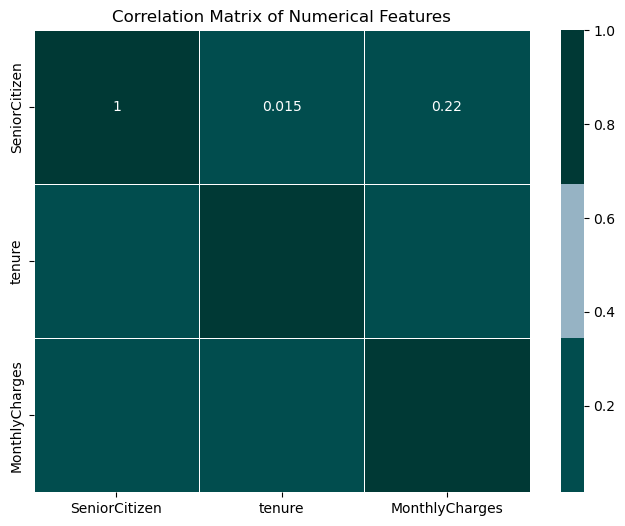

In [545]:
# Create heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=['#014d4e','#96b3c4', '#003935'], linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [30]:
#Observation
# - There is a moderate positive correlation (0.25) between tenure and 
#   MonthlyCharges, suggesting that customers with longer tenure tend to have 
#   slightly higher monthly charges.
# - There is a weak positive correlation (0.22) between SeniorCitizen and 
#   MonthlyCharges, suggesting that senior citizens might have slightly higher 
#   monthly charges on average.
# - Overall, the correlations between the numerical features are not very strong.


##Exploratory data analysis(EDA)

# Univariate Analysis

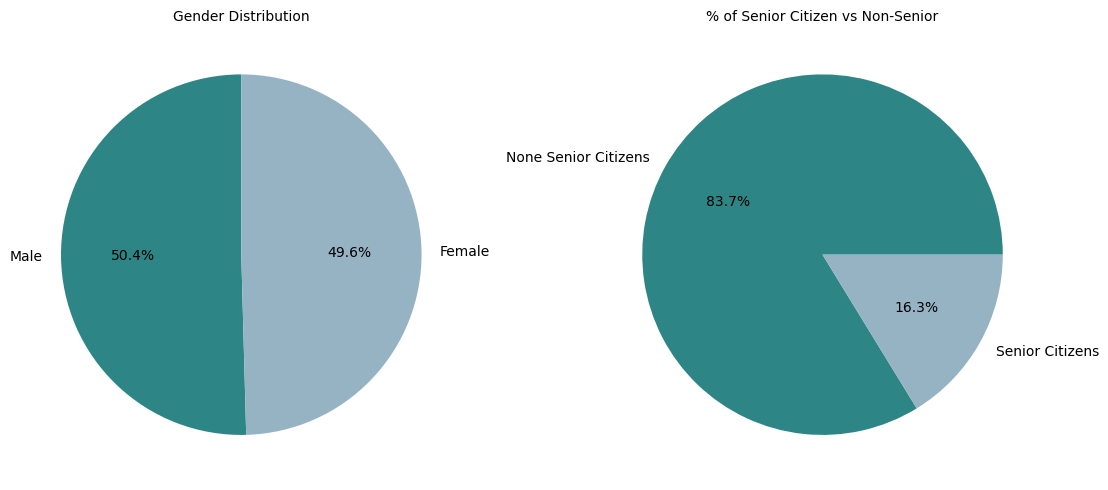

In [547]:
# Demographic Analysis

plt.figure(figsize=(10, 6))

# Gender Distribution
plt.subplot(1, 2, 1)
gender_counts = ConTel_df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2d8685', '#96b3c4'])
plt.title('Gender Distribution', fontsize=10)

# Senior Citizen Distribution
plt.subplot(1, 2, 2)
SeniorCitizen_counts = ConTel_df['SeniorCitizen'].value_counts()
SeniorCitizen_percentage = (SeniorCitizen_counts * 100 / len(ConTel_df))
ax = SeniorCitizen_percentage.plot.pie(autopct='%.1f%%', labels=['None Senior Citizens', 'Senior Citizens'], 
                                      figsize=(12, 5), fontsize=10, colors=['#2d8685', '#96b3c4'])
ax.set_ylabel('')
ax.set_title('% of Senior Citizen vs Non-Senior', fontsize=10)

# plot fit
plt.tight_layout()
plt.subplots_adjust(right=0.9) 

plt.show()

In [34]:
#Observations from Demographics:
#Gender Distribution:
# - The dataset shows an almost even split between male and female customers,
#   indicating no significant gender bias in the customer base.
#Senior Citizen Distribution:
# - A smaller proportion of customers identify as senior citizens, suggesting
#   that the majority of the customer base consists of younger individuals

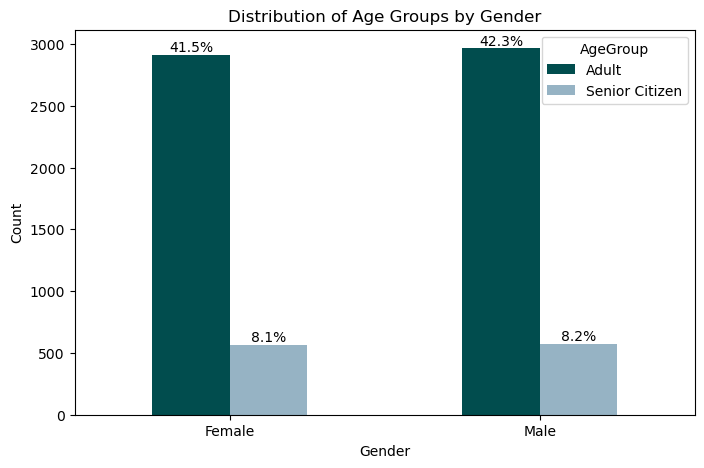

In [549]:
# Age Group
# AgeGroup' based on 'SeniorCitizen'
ConTel_df['AgeGroup'] = ConTel_df['SeniorCitizen'].apply(lambda x: 'Senior Citizen' if x == 1 else 'Adult')

# Count occurrences of each age group and gender
age_gender_counts = ConTel_df.groupby(['gender', 'AgeGroup']).size().unstack(fill_value=0)

# Plot the bar graph
ax = age_gender_counts.plot(kind='bar', figsize=(8, 5),fontsize=10, color=['#014d4e','#96b3c4'])
plt.title('Distribution of Age Groups by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Plot
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.1f}%'.format(height / total_customers * 100), ha='center', va='bottom')

plt.show()

In [36]:
#Observation
# majority of customers across both genders fall within the  "Adult" age groups
# Male gender has a slight increase in the number of senior citizens
# Recommendation#
# The distribution of "Senior" customers between genders, can be a great potential marketing opportunity to target
# offering tailored services or promotions.

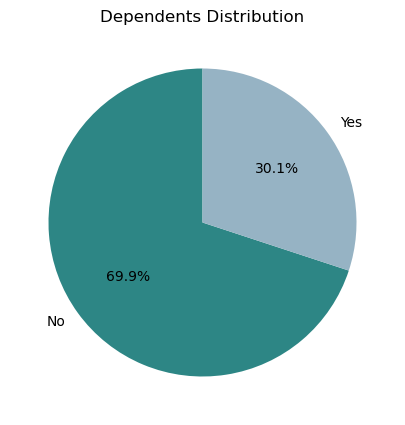

In [551]:
#Dependants Distribution
plt.figure(figsize=(8, 5))
dependents_counts = ConTel_df['Dependents'].value_counts()
plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2d8685', '#96b3c4'])
plt.title('Dependents Distribution')
plt.show()

In [38]:
#Observation
# - The majority of customers (70%) do not have dependents, indicating a
#   A significant portion of the customer base might be single individuals or
#   couples without children.
# - This information can be valuable for targeted marketing campaigns or
#   service offerings tailored to specific customer segments.

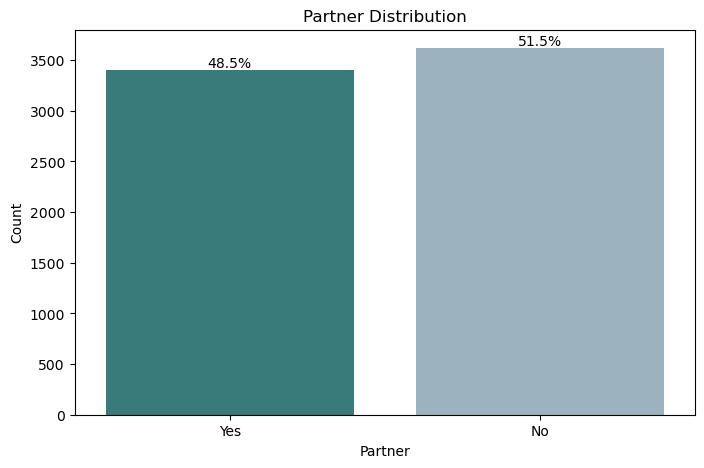

In [553]:
# Partner Distribution 
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Partner', data=ConTel_df, palette=['#2d8685', '#96b3c4'])
plt.title('Partner Distribution')
plt.xlabel('Partner')
plt.ylabel('Count')

# plot
total = len(ConTel_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

In [40]:
#Observation
#customer base is almost evenly split between those with and without
#partners at 3% differnce

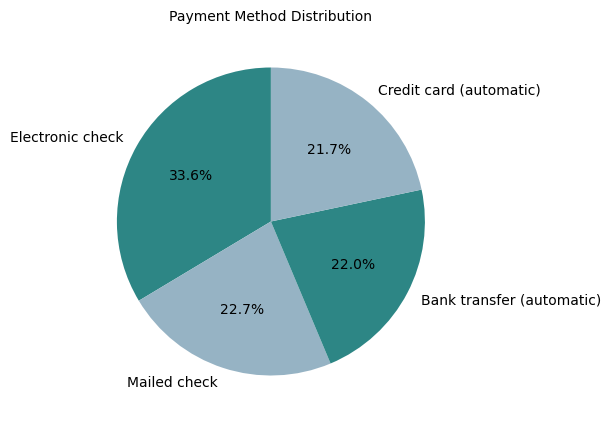

In [555]:
# Payment Method Distribution
plt.figure(figsize=(8, 5))
payment_method_counts = ConTel_df['PaymentMethod'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 10}, colors=['#2d8685', '#96b3c4', '#2d8685', '#96b3c4'])
plt.title('Payment Method Distribution',fontsize=10)
plt.show()

In [42]:
#Observation on PaymentMethods
#- Electronic check emerges as the most preferred payment method,
#- followed by mailed check, bank transfer (automatic), and credit card (automatic).
#-This suggests a preference for electronic and automated payment options among customers.
#Recommendation#
# - Company might consider promoting electronic payment methods further to streamline transactions and potentially reduce costs associated with
#   manual payment processing.


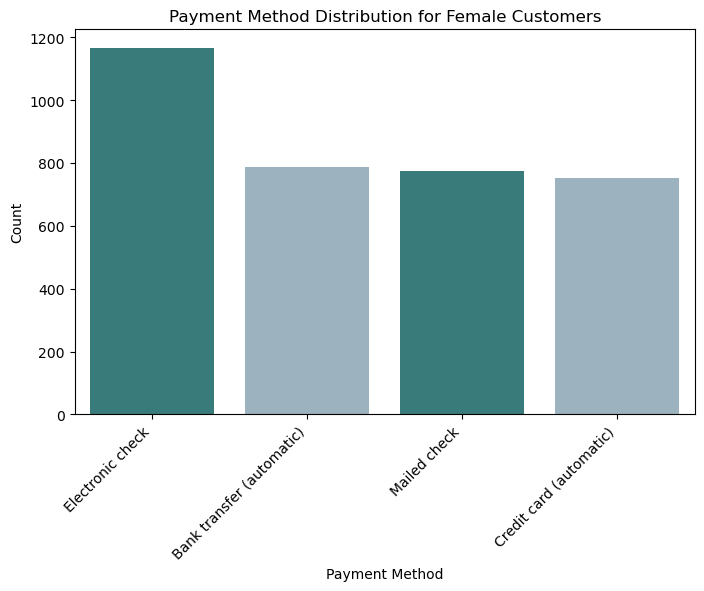

In [557]:
# Female Payment preference

# extraxting data for female customers
female_customers = ConTel_df[ConTel_df['gender'] == 'Female']

# Count payment methods for female customers
payment_method_counts = female_customers['PaymentMethod'].value_counts()

# Ploting bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette=['#2d8685', '#96b3c4', '#2d8685', '#96b3c4'])
plt.title('Payment Method Distribution for Female Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


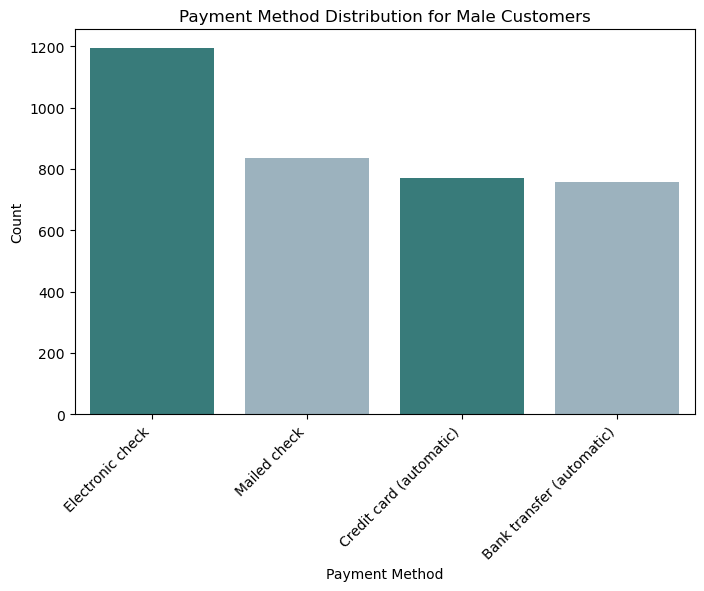

In [501]:
# Male payment method preference

# Filter data for male customers
male_customers = ConTel_df[ConTel_df['gender'] == 'Male']

# Count payment methods for male customers
payment_method_counts = male_customers['PaymentMethod'].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette=['#2d8685', '#96b3c4', '#2d8685', '#96b3c4'])
plt.title('Payment Method Distribution for Male Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


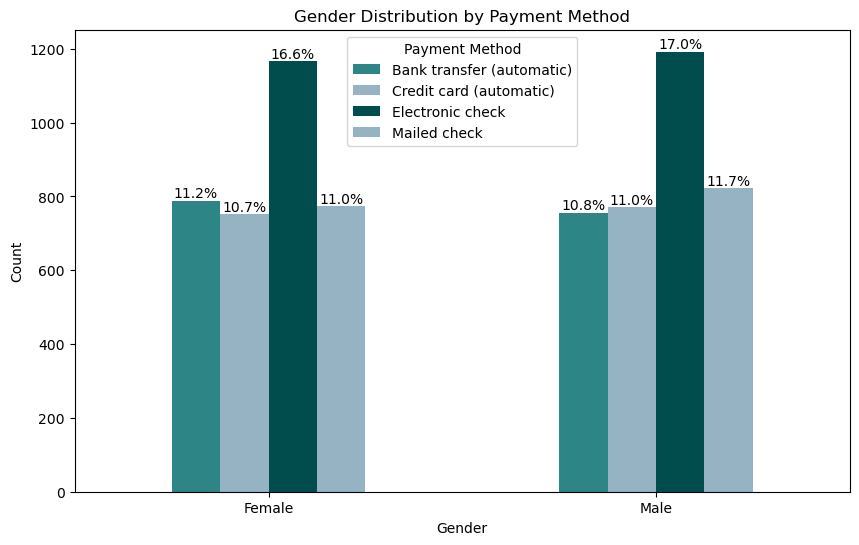

In [559]:
# Group gender and payment method, 
gender_payment_counts = ConTel_df.groupby(['gender', 'PaymentMethod']).size().unstack(fill_value=0)

# Plot clustered bar chart
ax = gender_payment_counts.plot(kind='bar', figsize=(10, 6), color=['#2d8685', '#96b3c4', '#014d4e', '#96b3c4'])
plt.title('Gender Distribution by Payment Method')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')

# Statistic %
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.1f}%'.format(height / total_customers * 100), ha='center', va='bottom')

plt.show()


In [46]:
#Observation 
# - Electronic check is the most popular payment method for both genders,
#   indicating a general preference for this option.
# - Mailed check is the second most preferred method for both genders,
#   suggesting a significant portion of customers still opt for traditional
#   billing.
# - Bank transfer (automatic) and credit card (automatic) are used by a
#   smaller proportion of customers, with a slightly higher preference among
#   females for credit card (automatic) payments.
# - The distribution of payment methods across genders appears relatively
#   balanced, suggesting no strong gender-specific preferences for particular payment options

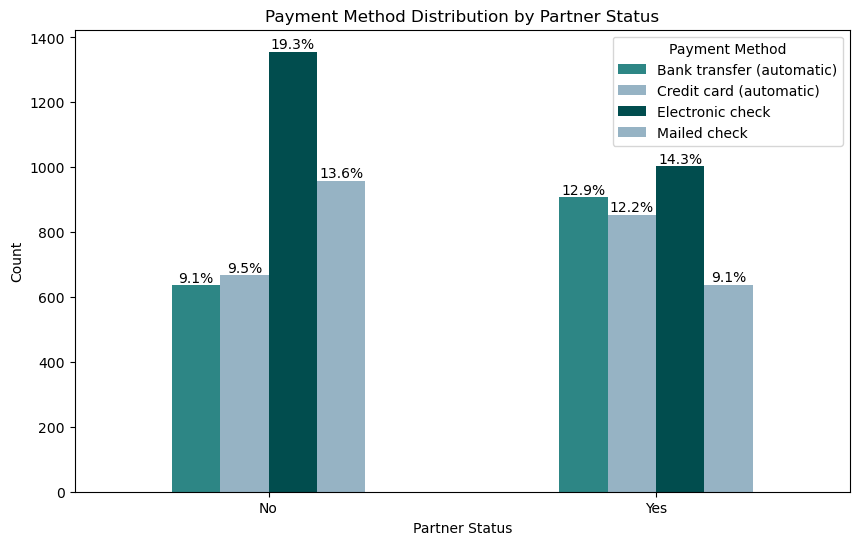

In [561]:
##Payment method distribution by partner status 

# Group data by Partner and PaymentMethod, then count occurrences
partner_payment_counts = ConTel_df.groupby(['Partner', 'PaymentMethod']).size().unstack(fill_value=0)

# Ploting clustered bar chart
ax = partner_payment_counts.plot(kind='bar', figsize=(10, 6), color=['#2d8685', '#96b3c4', '#014d4e', '#96b3c4'])
plt.title('Payment Method Distribution by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')

# plot%
total_customers = len(ConTel_df)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.1f}%'.format(height / total_customers * 100), ha='center', va='bottom')

plt.show()


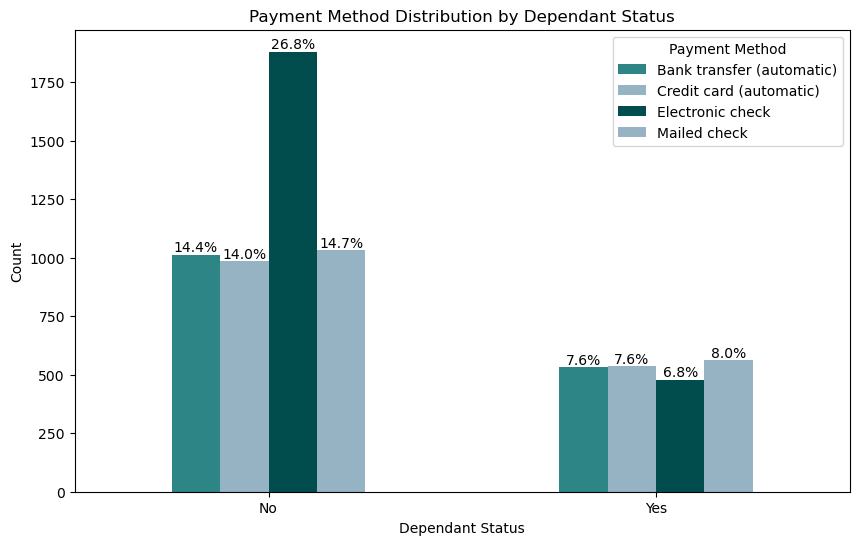

In [563]:
#Payment method distribution by dependant status

# Extraction of Partner and PaymentMethod, then count occurrences
dependant_payment_counts = ConTel_df.groupby(['Dependents', 'PaymentMethod']).size().unstack(fill_value=0)

# Plot clustered bar chart
ax = dependant_payment_counts.plot(kind='bar', figsize=(10, 6), color=['#2d8685', '#96b3c4', '#014d4e', '#96b3c4'])
plt.title('Payment Method Distribution by Dependant Status')
plt.xlabel('Dependant Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')

#plot %
total_customers = len(ConTel_df)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.1f}%'.format(height / total_customers * 100), ha='center', va='bottom')

plt.show()


In [49]:
#Observation
# - Electronic check remains the most popular payment method across both
#   groups (with and without partners).
# - Customers with partners show a slightly higher preference for mailed
#   checks compared to those without partners.
# - Customers more favor bank transfer (automatic) with partners,
#   while credit card (automatic) shows a slightly higher preference among
#   those without partners.
# - These subtle differences might suggest variations in financial
#   management or preferences between customers with and without partners,


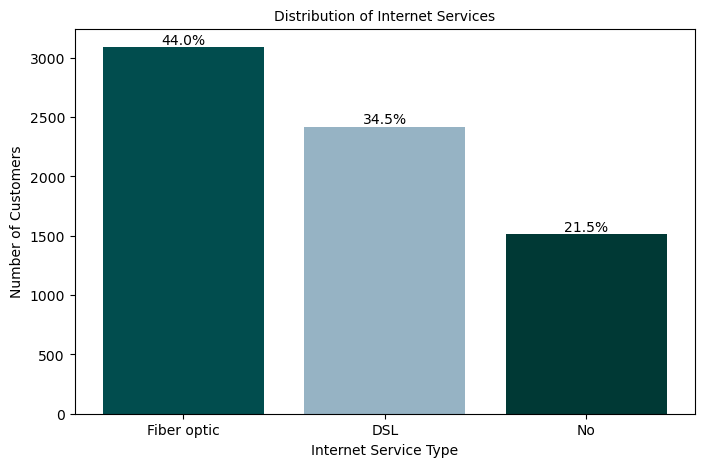

In [567]:
#Count of internet  service
internet_no_churn = ConTel_df['InternetService'].value_counts()
plt.figure(figsize=(8, 5))
#Exclude churn
bars = plt.bar(internet_no_churn.index, internet_no_churn.values, color=['#014d4e','#96b3c4', '#003935'])
plt.title('Distribution of Internet Services',fontsize=10)
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')

total = sum(internet_no_churn.values)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.1f}%'.format(height/total*100), ha='center', va='bottom')

plt.show()

In [51]:
#-Fiber optic is the most popular internet service type among customers who have not churned, indicating a potential association between high-speed
#   internet and customer retention.
# - DSL is the second most common choice, suggesting it remains a viable option   for a significant portion of the customer base.
# - A smaller segment of customers opt for no internet service, which could represent those who primarily rely on other telecommunication services
#   offered by the company.

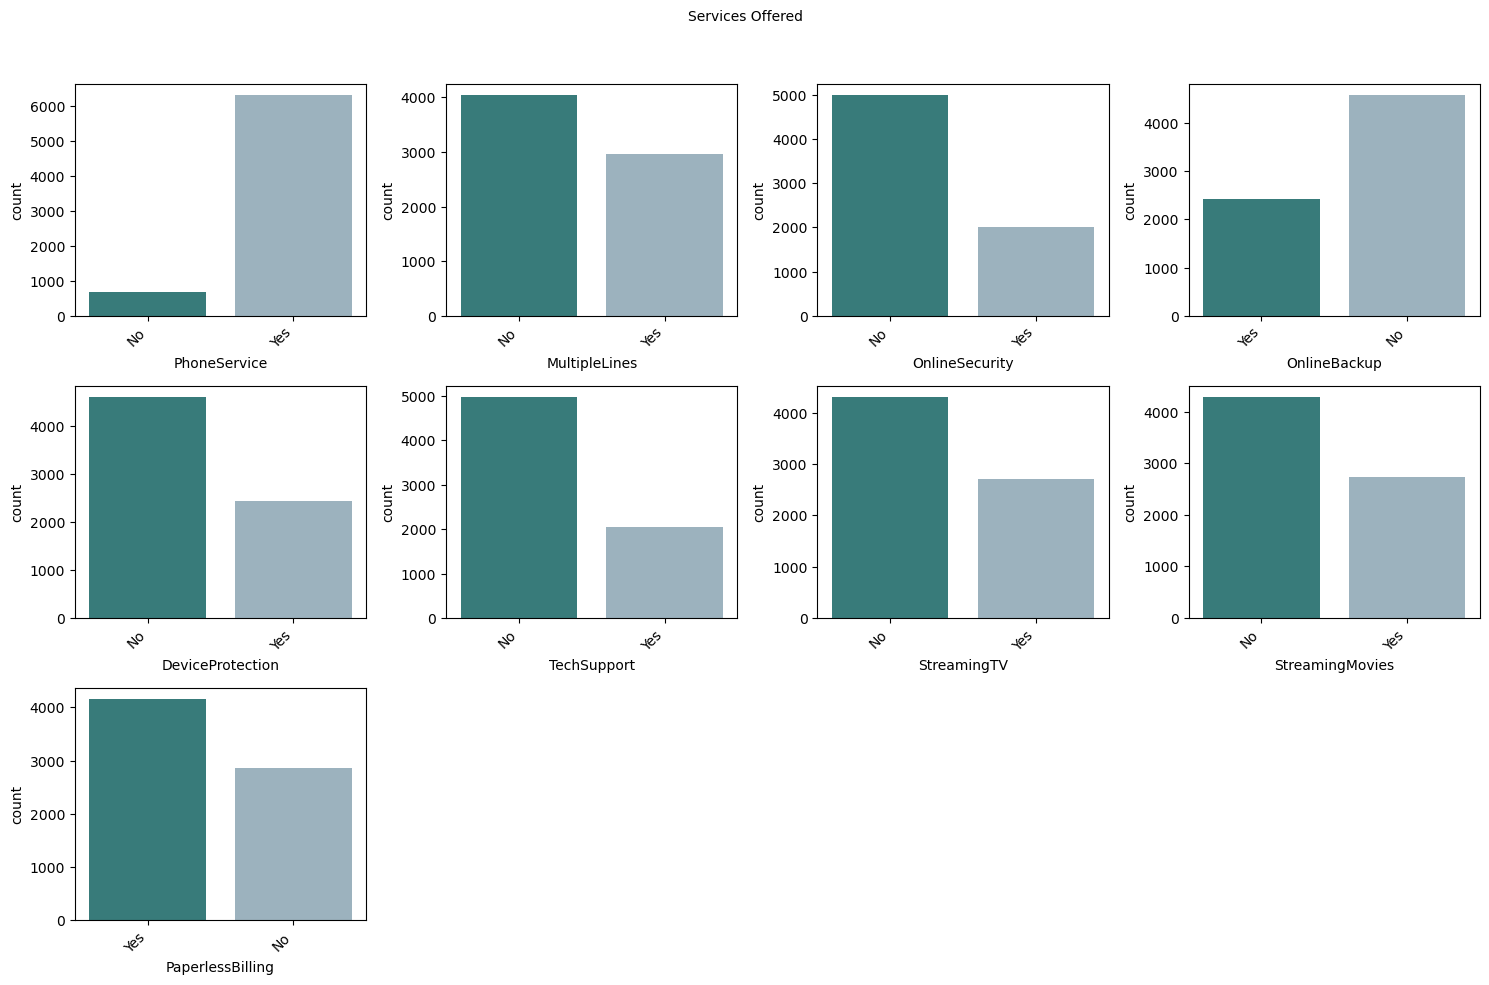

In [569]:
cat_cols = ['PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
               'PaperlessBilling']

plt.figure(figsize=(15, 15))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    # Use the 'palette' parameter for seaborn's countplot
    g=sns.countplot(data=ConTel_df, x=ConTel_df[variable], ax=ax, palette=['#2d8685', '#96b3c4','#003935'])
    plt.xticks(rotation=45, ha='right')
    plt.suptitle('Services Offered', fontsize=10, y=1.02)
    plt.tight_layout()
plt.show()

In [53]:
#Observation
# - Phone Service: A majority of customers have phone service, indicating it's a core offering.
# - Multiple Lines: A significant portion of customers opt for multiple lines, suggesting a demand for bundled services.
# - Online Security: A substantial number of customers choose not to have online security, highlighting a potential area for improvement or targeted promotions.
# - Online Backup: Similar to online security, a considerable number of customers forego online backup, presenting an opportunity to increase adoption.
# - Device Protection: The adoption of device protection is relatively balanced, with a slight inclination towards not having it.
# - Tech Support: A notable portion of customers opt out of tech support, suggesting a need to address potential barriers to adoption or improve perceived value.
# - Streaming TV and Movies: Both streaming services show a relatively even split between those who subscribe and those who don't.
# - Paperless Billing: A majority of customers prefer paperless billing, indicating a shift towards digital communication and convenience.

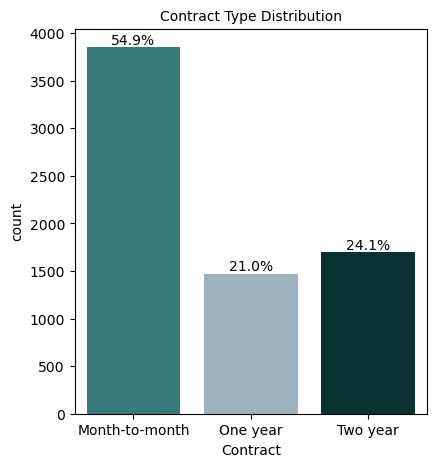

In [571]:
#Contract Distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Contract', data=ConTel_df, palette=['#2d8685', '#96b3c4','#003935']) # Assign to ax
plt.title('Contract Type Distribution',fontsize=10)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.text(x + width / 2, y + height, '{:.1f}%'.format(height/total*100), ha='center', va='bottom') 

plt.show()

In [55]:
#Observation on Contract Type Distribution:
# - The majority of customers are on a month-to-month contract, indicating a
#   preference for flexibility.
# - A smaller proportion of customers have opted for longer-term contracts
#   (one or two years), suggesting a commitment to the service.


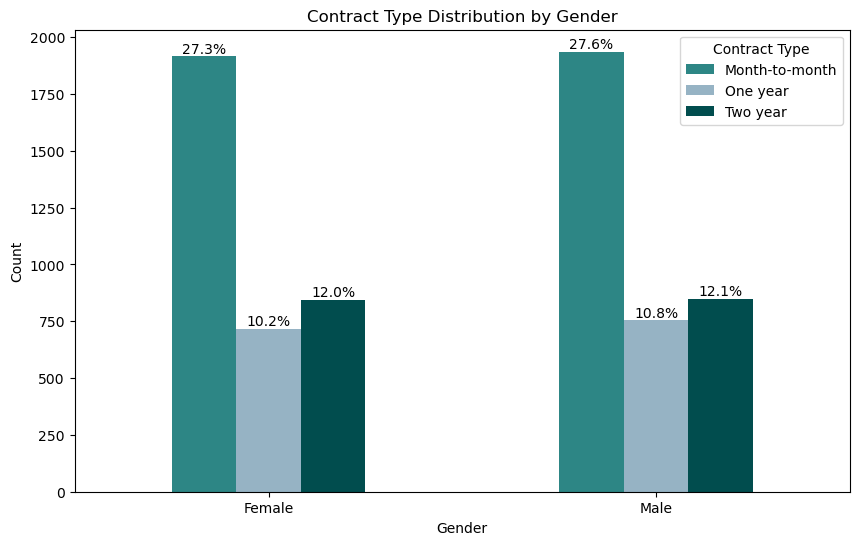

In [573]:
# Contract type by gender

# extracting Gender and Contract, then count occurrences
gender_contract_counts = ConTel_df.groupby(['gender', 'Contract']).size().unstack(fill_value=0)

# Plot clustered bar chart
ax = gender_contract_counts.plot(kind='bar', figsize=(10, 6), color=['#2d8685', '#96b3c4', '#014d4e'])
plt.title('Contract Type Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Contract Type')

# plot %
total_customers = len(ConTel_df)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height, '{:.1f}%'.format(height / total_customers * 100), ha='center', va='bottom')

plt.show()


In [57]:
#Observation
# - Month-to-month contracts are the most prevalent choice for both genders, 
#   suggesting a general preference for flexibility.
# - The proportion of Male opting for month-to-month contracts is 
#   slightly higher compared to female.
# - Both genders show a similar distribution for one-year and two-year 
#   contracts. 

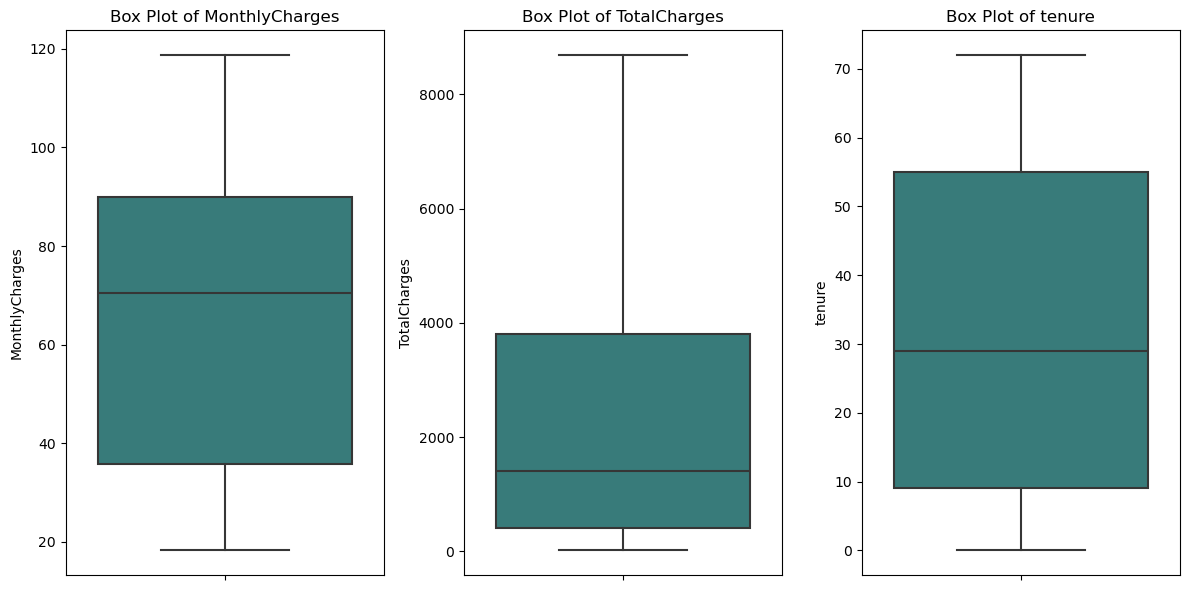

In [575]:
# Convert columns to numeric  
ConTel_df['MonthlyCharges'] = pd.to_numeric(ConTel_df['MonthlyCharges'], errors='coerce')  
ConTel_df['TotalCharges'] = pd.to_numeric(ConTel_df['TotalCharges'], errors='coerce')  
ConTel_df['tenure'] = pd.to_numeric(ConTel_df['tenure'], errors='coerce')  

# Box plot for numerical features  
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']  

# Box plots  
plt.figure(figsize=(12, 6))  
for i, feature in enumerate(numerical_features):  
    plt.subplot(1, len(numerical_features), i + 1)  
    sns.boxplot(y=ConTel_df[feature], color='#2d8685')  
    plt.title(f'Box Plot of {feature}')  
    plt.ylabel(feature)  

plt.tight_layout()  
plt.show()

In [59]:
#Observation
# IQR for monthly charges encompases 50% of data,indicating monthly charges concentration
# On total charges we have some outliers,could be an indication accumulated total charges overtime
# Tenure shows the central portion of customer tenure

#Exploratory Data Analysis:Bivariate Analysis

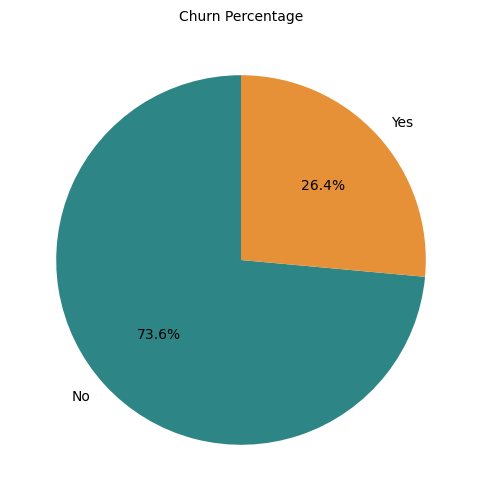

In [577]:
#Churn Rate Analysis
churn_counts = ConTel_df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#2d8685', '#e69138'])
plt.title('Churn Percentage',fontsize=10)
plt.show()

In [62]:
#Observation
#Overall churn rate,stands at around 26.5%
#Customers who have not churned is at 73.6%
#A significant portion of the customer base has churned, which is a challenge for the company in terms of customer retention.

In [579]:
# Total customers after churn
total_remaining = ConTel_df.shape[0] - total_churned
print("Total Customers Remaining:", total_remaining)

# Revenue lost due to churn
revenue_lost = ConTel_df[ConTel_df['Churn'] == 'Yes']['MonthlyCharges'].sum()
print("Revenue Lost Due to Churn:", revenue_lost)

# Total revenue  after churn
total_revenue_remaining = total_revenue - revenue_lost
print("Total Revenue Remaining:", total_revenue_remaining)

Total Customers Remaining: 5164
Revenue Lost Due to Churn: 138540.19999999998
Total Revenue Remaining: 316784.95000000007


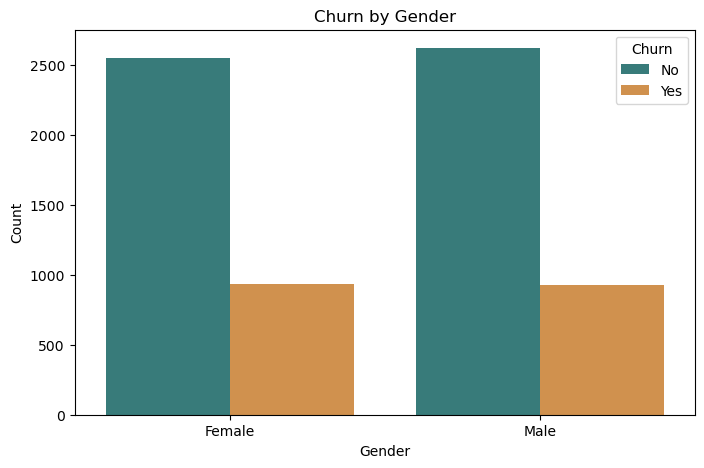

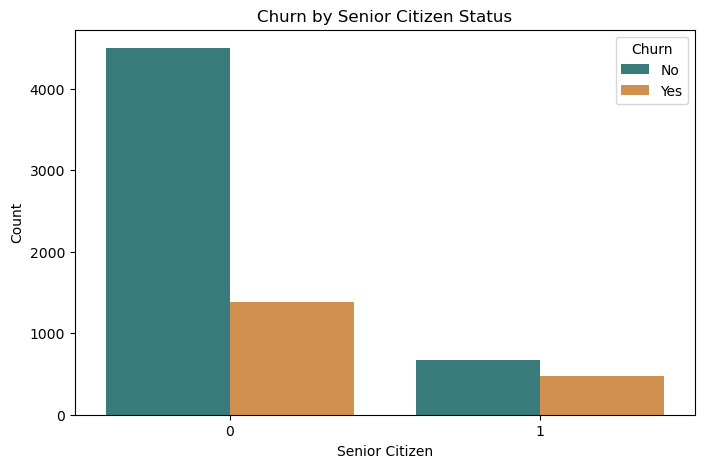

In [581]:
# Churn by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Churn by Senior Citizen Status
plt.figure(figsize=(8, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()



In [65]:
#Churn by Gender:
# - The churn rate appears to be similar for both male and female customers, 
#   suggesting that gender is not a significant factor influencing churn.

#Churn by Senior Citizen Status:
# - Senior citizens exhibit a higher churn rate compared to non-senior 
#   citizens, indicating that this demographic might be more prone to 
#   discontinuing the service

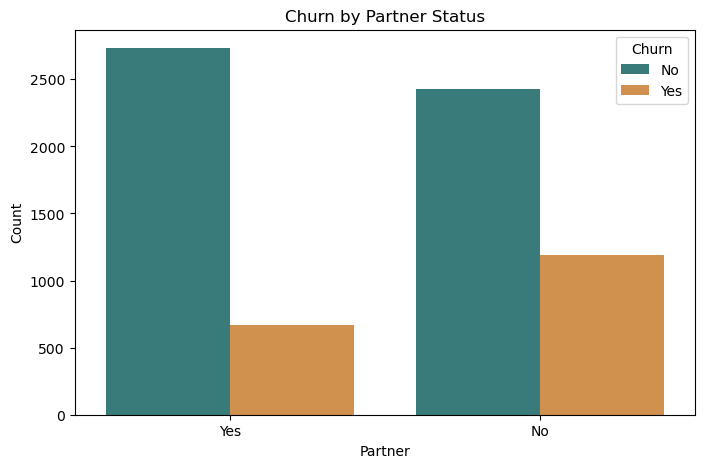

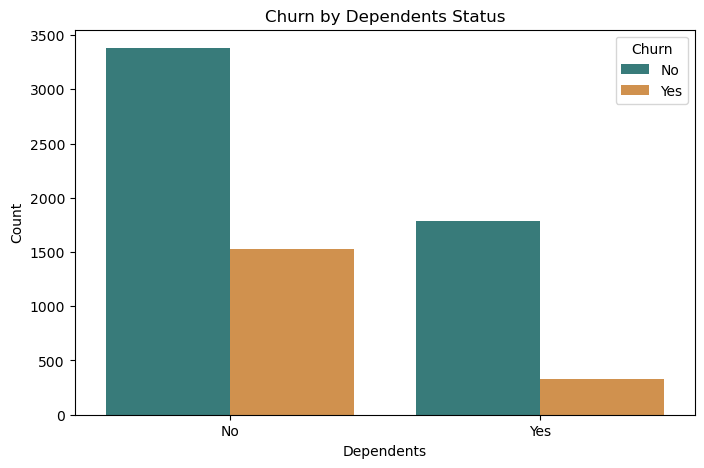

In [583]:
# Churn by Partner Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Partner', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

# Churn by Dependents Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Dependents', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Dependents Status')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

In [67]:
#Churn by Partner Status:
# - Customers with partners demonstrate a lower churn rate compared to those 
#   without partners. This suggests that having a partner might contribute to 
#   customer retention.

#Churn by Dependents Status:
# - Customers with dependents show a significantly lower churn rate compared 
#   to those without dependents. This implies that having dependents might be 
#   a strong factor in customer retention.

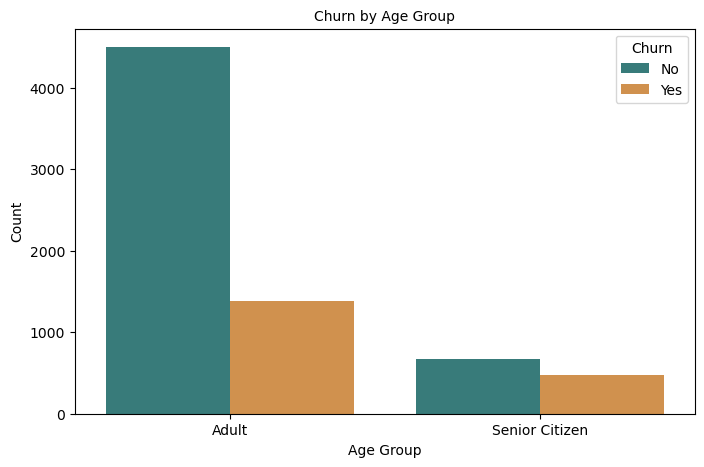

In [585]:
# Churn by Age Group
plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Age Group',fontsize=10)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [69]:
#Observation
#Adults have a  higher churn rate  than Seniors with a  moderate churn rate.
#indicates that seniors may be more loyal than  adults
#Recommendation#
# Develop a retention strategies targeted at adults to reduce churn

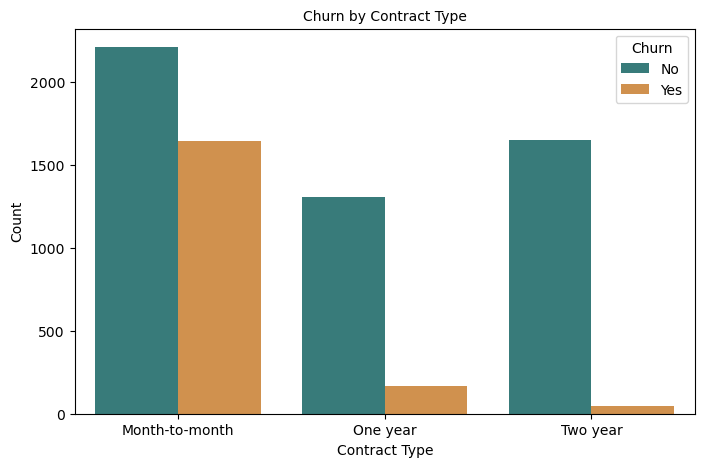

In [587]:
# Churn by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Churn by Contract Type',fontsize=10)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

In [71]:
 #Observation on Churn by Contract Type:

# - Customers with month-to-month contracts exhibit the highest churn rate,
#   indicating that the flexibility of this contract type might also lead to
#   easier cancellation.
# - Customers with longer-term contracts (one or two years) have
#   significantly lower churn rates, suggesting that these customers are more
#   likely to stay with the service.
# - This highlights the importance of contract type in customer retention
#   strategies.

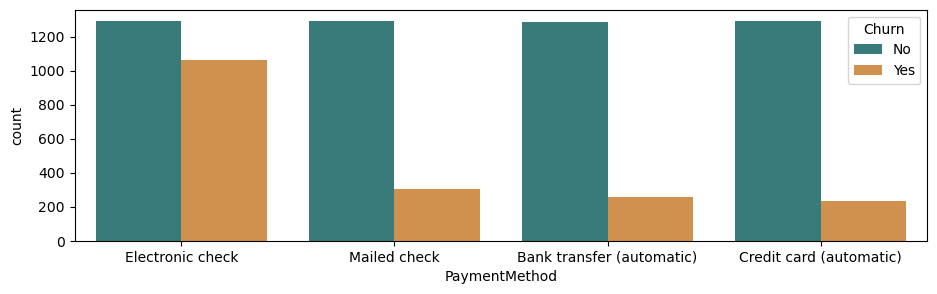

<Figure size 640x480 with 0 Axes>

In [589]:
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=ConTel_df, palette=['#2d8685', '#e69138']) 
plt.show()
plt.tight_layout()

In [73]:
# Observations on Payment Methods:
# - Customers who pay by electronic check have a significantly higher churn rate than other payment methods.
# - Customers using automatic payments (bank transfer or credit card) tend to have lower churn rates.
# - This suggests that the convenience of automatic payments might contribute to customer retention.
##Recommendation
# - It's worth investigating why customers paying by electronic check are more likely to churn. This could be related to billing issues, lack of trust in electronic payments, or other factors.

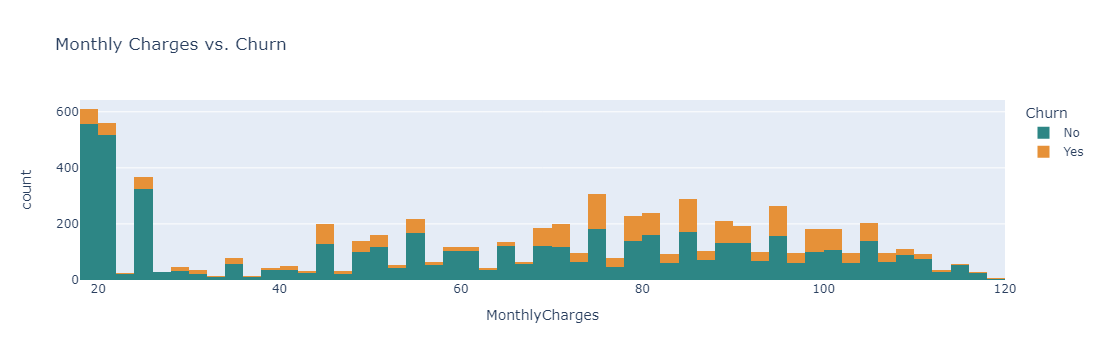

In [591]:
# Monthly Charges vs. Churn

fig = px.histogram(ConTel_df, x='MonthlyCharges', color='Churn',
                   color_discrete_map={'No': '#2d8685', 'Yes': '#e69138'},
                   title='Monthly Charges vs. Churn')

fig.show()

In [75]:
# Observations on Monthly Charges vs. Churn:
# - Customers who churn tend to have higher monthly charges than those who don't.
# - There's a noticeable peak in churn for customers with monthly charges around $70-$90.
# - Customers with very low monthly charges generally have a lower churn rate. This could indicate they are on basic plans with fewer features.
#Recommendation
# - It's important to investigate why customers in the mid-to-high monthly charge range are more likely to churn. This could be due to factors like price sensitivity, competition, or dissatisfaction with the service.

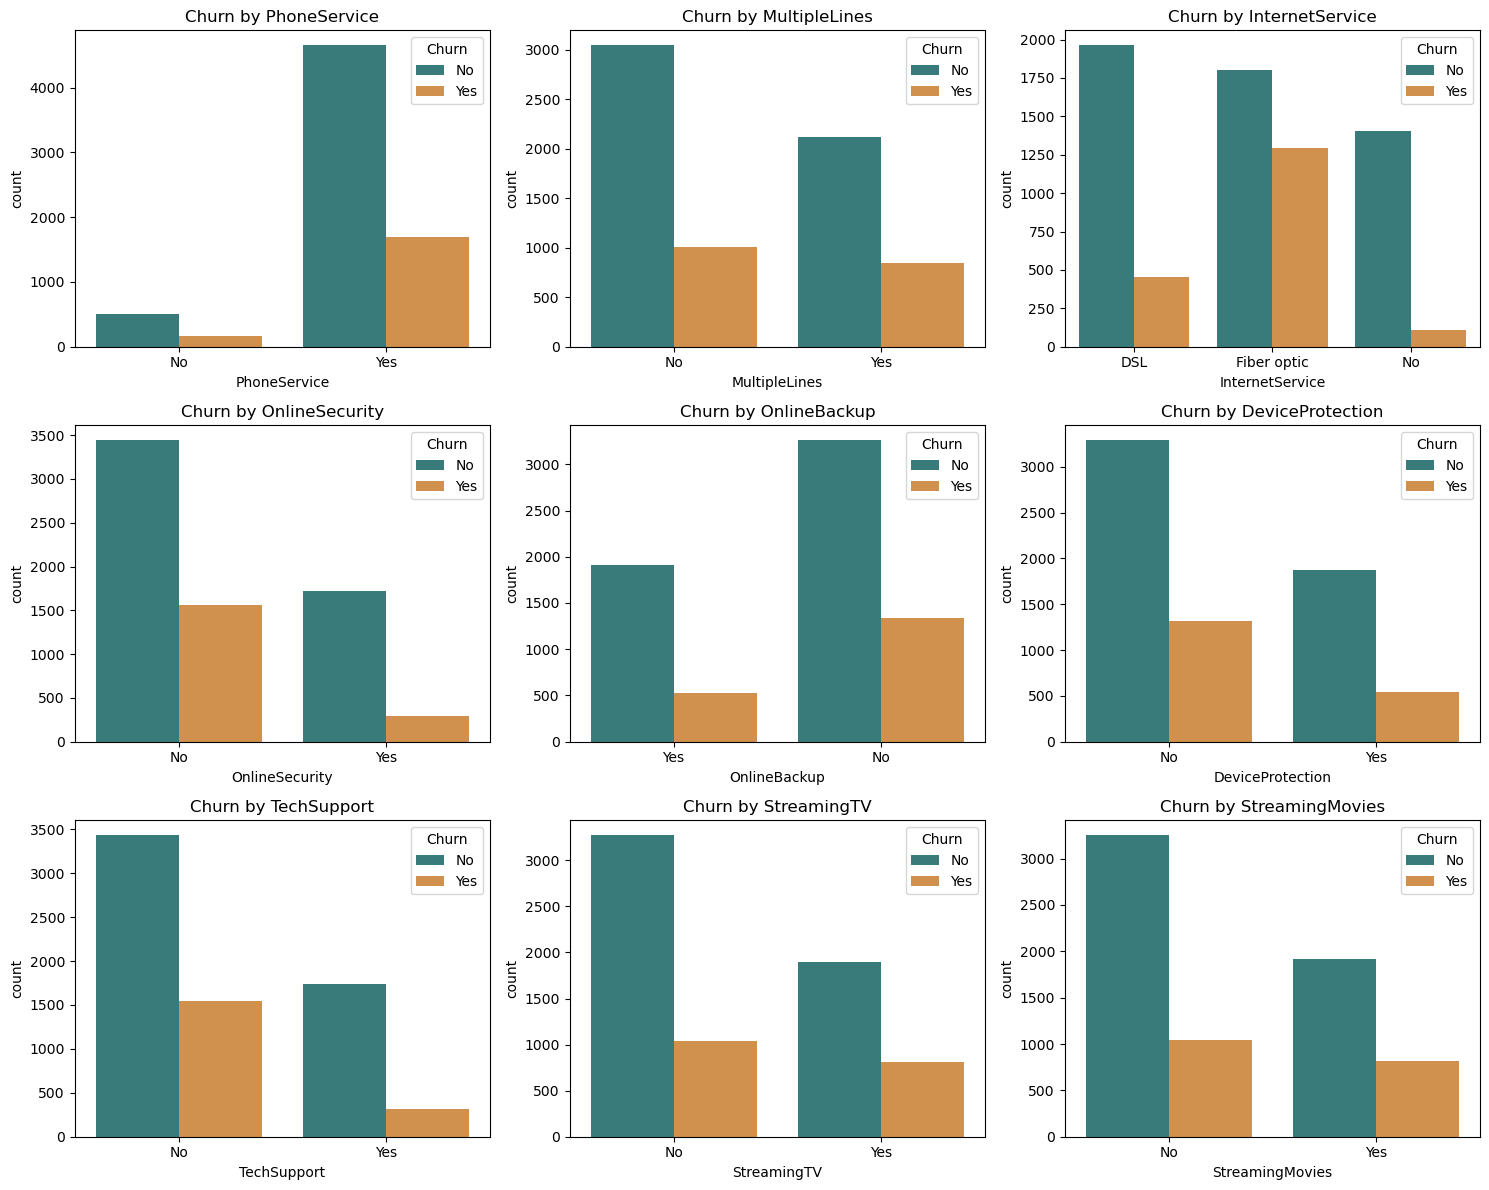

In [593]:
# Services Features by Churn
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies']

import matplotlib.pyplot as plt  # Make sure to import matplotlib.pyplot
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12)) # Call subplots directly from plt
for i, service in enumerate(services):
    row = i // 3
    col = i % 3
    sns.countplot(x=service, hue='Churn', data=ConTel_df, ax=axes[row, col], palette={'Yes': '#e69138', 'No': '#2d8685'})
    axes[row, col].set_title(f'Churn by {service}')

plt.tight_layout()
plt.show()

In [77]:
# Observations on Churn by Services:

# - Phone Service: Churn rate is similar for customers with and without phone service, suggesting it's not a major factor.
# - Multiple Lines: Customers with multiple lines have a slightly higher churn rate, potentially indicating complexity or cost concerns.
# - Internet Service: Fiber optic customers have a significantly higher churn rate, possibly due to competition or pricing issues.
# - Online Security, Online Backup, Tech Support: Customers without these services have higher churn rates, highlighting their importance for retention.
# - Device Protection: Churn rate is relatively balanced, suggesting it's not a primary driver of churn.
# - Streaming TV and Movies: Churn rates are similar for customers with and without these services.


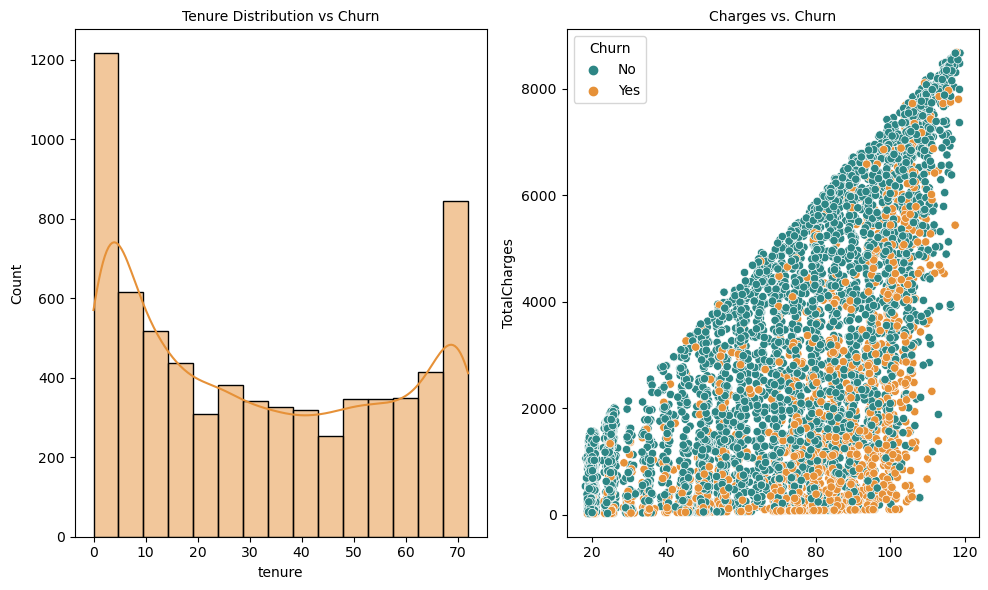

In [595]:
# Tenure and Charges
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(ConTel_df['tenure'], kde=True, color='#e69138')
plt.title('Tenure Distribution vs Churn',fontsize=10)

plt.subplot(1, 2, 2)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=ConTel_df, palette={'Yes': '#e69138', 'No': '#2d8685'})
plt.title('Charges vs. Churn',fontsize=10)

plt.tight_layout()
plt.show()

In [79]:
# Observations on Tenure and Charges:

# Tenure Distribution:
# - The distribution of tenure is right-skewed, indicating that a larger proportion of customers have shorter tenures.
# - There's a peak in churn for customers with very short tenures (around 0-10 months).
# - Longer tenures generally correspond to lower churn rates, suggesting that customer loyalty increases over time.

# Charges vs. Churn:
# - As observed earlier, customers who churn tend to have higher monthly charges.
# - There's a positive correlation between monthly charges and total charges, which is expected.
# - Customers with higher total charges (likely due to longer tenures and higher monthly charges) are less likely to churn.


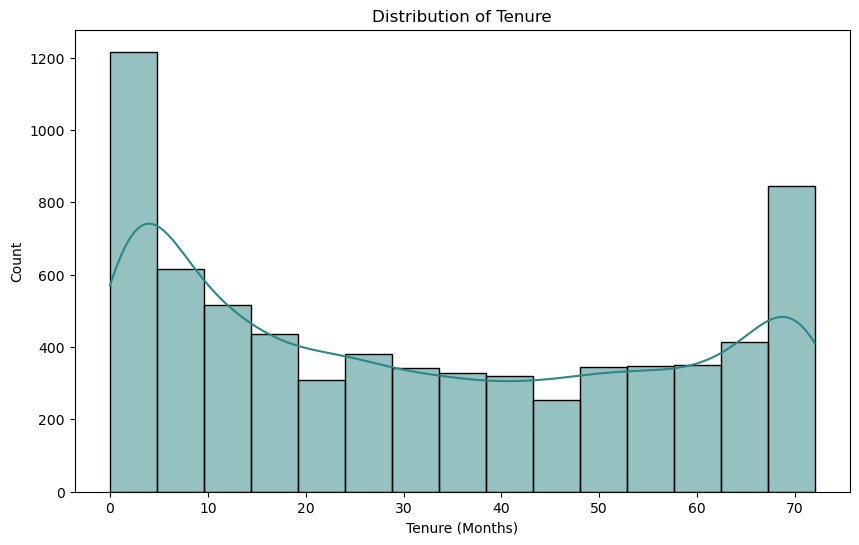

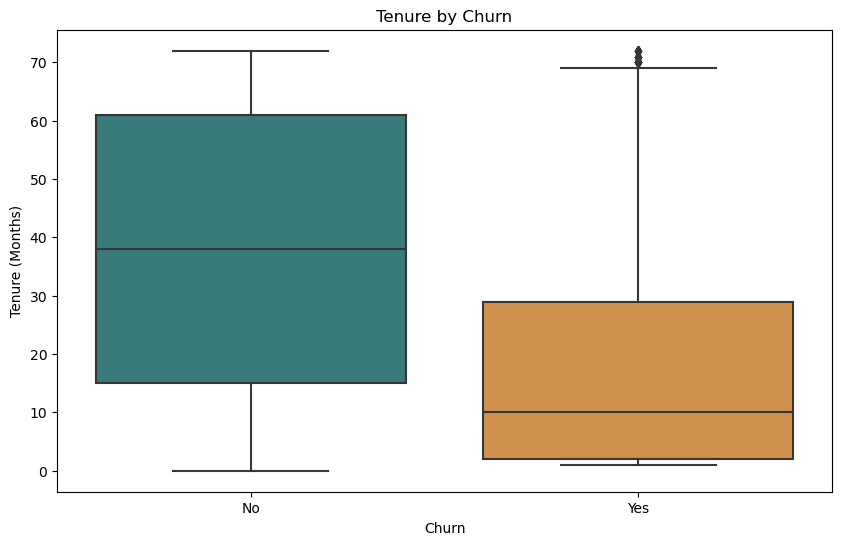

        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5164.0  37.640782  24.083296  0.0  15.0  38.0  61.0  72.0
Yes    1857.0  18.088853  19.546231  1.0   2.0  10.0  29.0  72.0


In [599]:
# Exploring the distribution of tenure by churn to understand customer retention patterns

# Distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(ConTel_df['tenure'], kde=True, color='#2d8685')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

# Tenure by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=ConTel_df, palette=['#2d8685', '#e69138'])
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Summary statistics of tenure by churn
print(ConTel_df.groupby('Churn')['tenure'].describe())

In [ ]:
#Observation
# - The distribution of tenure is right-skewed, indicating a higher concentration of customers with shorter tenures. 
# - This suggests that a significant portion of the customer base is relatively new to the service.

# Tenure by Churn:
# - The box plot clearly shows that customers who churn tend to have significantly shorter tenures compared to those who don't churn.
# - This highlights the importance of focusing on early-stage customer engagement and retention strategies.

# Summary Statistics:
# - The mean tenure for churned customers is much lower (17.98 months) compared to non-churned customers (37.57 months),
#emphasizes the vulnerability of newer customers to churn.

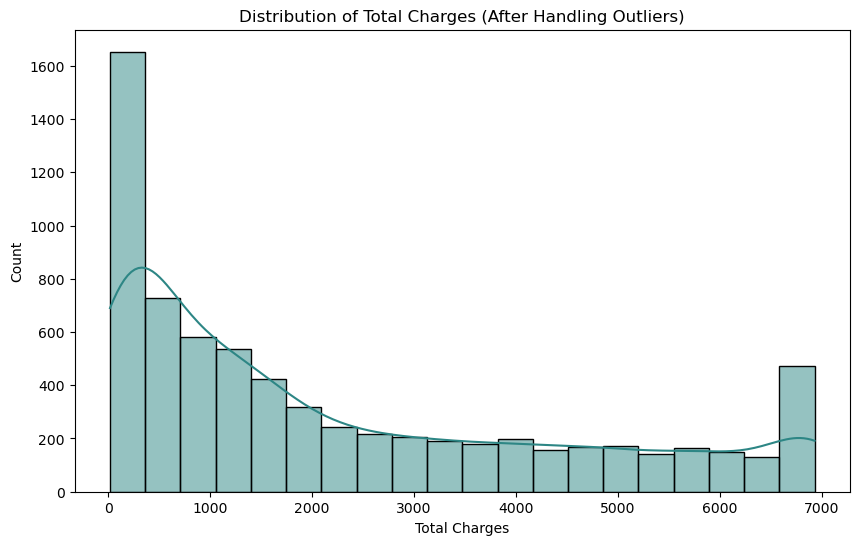

In [601]:
# Resolve  outliers

#  Capping:  maximum value for outliers (95%)
upper_cap = ConTel_df['TotalCharges'].quantile(0.95)
ConTel_df['TotalCharges'] = np.where(ConTel_df['TotalCharges'] > upper_cap, upper_cap, ConTel_df['TotalCharges'])


# Plot
plt.figure(figsize=(10, 6))
sns.histplot(ConTel_df['TotalCharges'], kde=True, color='#2d8685')
plt.title('Distribution of Total Charges (After Handling Outliers)')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.show()

In [ ]:
#Observation 
#Capping 95%
# - By capping the TotalCharges at the 95th percentile, we limit the influence of extreme values without removing them entirely.
# - This will preserves the overall distribution while mitigating the impact of potential outliers on analysis and modeling.

# Removal 
# - Removing outliers should be done cautiously and only when justified. It can lead to loss of information and potentially bias the analysis.
# - It's important to investigate the reasons for outliers before removing them to ensure they are not genuine high-value customers.

# After handling outliers, the distribution of TotalCharges appears to be more manageable and less influenced by extreme values. 
#This wil improve the accuracy and reliability of subsequent analysis and modeling.

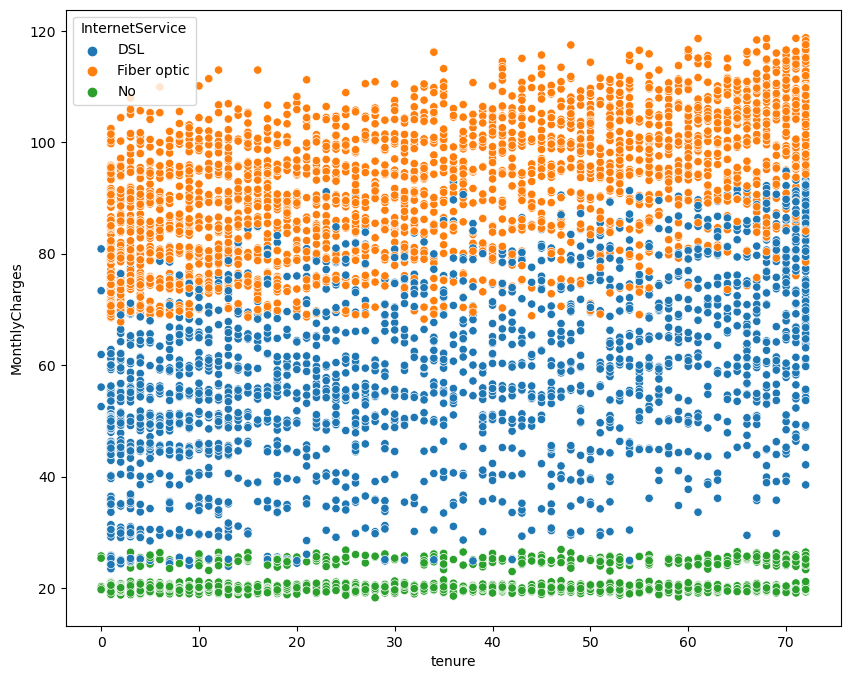

In [401]:
#Internet Services
plt.figure(figsize=(10, 8))  
sns.scatterplot(x='tenure', y='MonthlyCharges', data=ConTel_df, hue='InternetService')  
plt.show()

In [81]:
# Observations from the scatter plot of Tenure vs. Monthly Charges, colored by Internet Service:

# - Customers with Fiber optic internet service generally have higher monthly charges compared to DSL and No internet service.
# - There's a positive correlation between tenure and monthly charges for Fiber optic customers, indicating that those who stay longer tend to have higher bills.
# - DSL customers have a wider range of monthly charges, but generally lower than Fiber optic.
# - Customers with no internet service have the lowest monthly charges, as expected.
# - There's a cluster of Fiber optic customers with high monthly charges and relatively short tenure, which could indicate a potential for churn in this segment.


#Multivariate Analysis

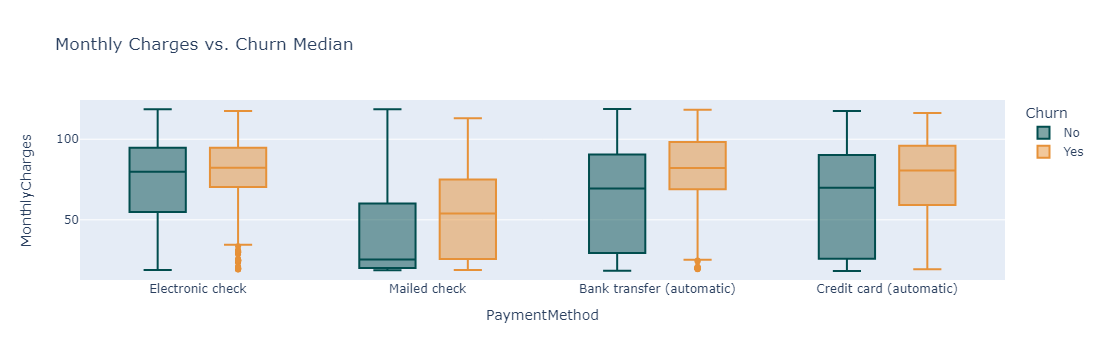

In [403]:
# Monthly chargers and churn median 
plt = px.box(ConTel_df,
              x='PaymentMethod',
              y='MonthlyCharges',
              color='Churn',
              color_discrete_sequence=['#014d4e', '#e69138'],
              title='Monthly Charges vs. Churn Median')

plt.show()

In [300]:
#Observations from the boxplot of Monthly Charges vs. Churn, grouped by Payment Method:
# - Electronic check payments show a higher median monthly charge for churned customers compared to non-churned customers. 
#   This suggests that customers using electronic checks might be more price-sensitive.
# - Mailed check payments have a similar pattern, with churned customers having a slightly higher median monthly charge.
# - Bank transfer and credit card payments show a less pronounced difference in median monthly charges between churned and non-churned customers.
# - Overall, the plot indicates that payment method could be a factor influencing churn, particularly for electronic check users. 
#   Further investigation into the reasons for this pattern might be helpful for customer retention strategies.


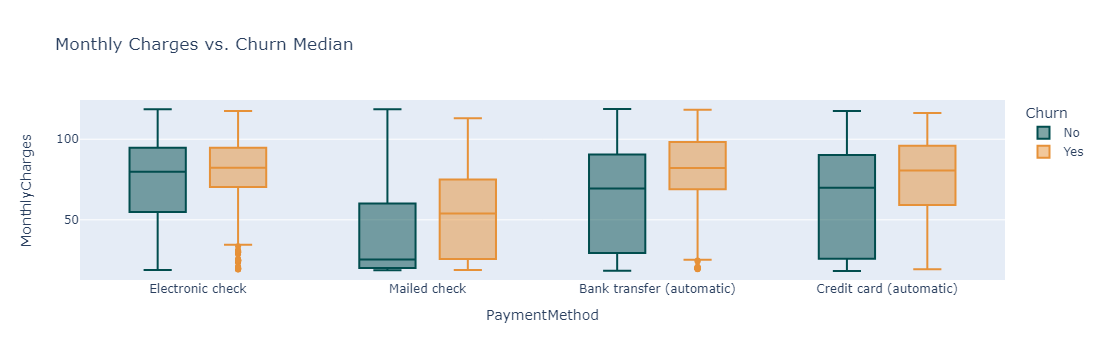

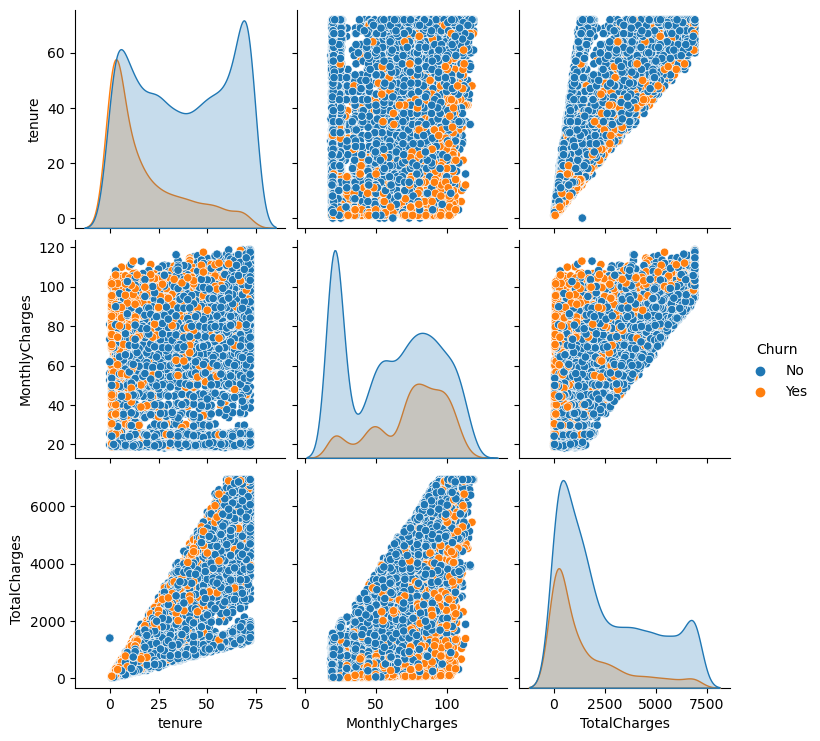

In [405]:
sns.pairplot(ConTel_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

In [86]:
# Observations from the pairplot of 'tenure', 'MonthlyCharges', 'TotalCharges', and 'Churn':

# - Tenure vs. MonthlyCharges: There's a positive correlation, indicating higher monthly charges for longer tenures. Churned customers seem to be concentrated in the lower tenure and higher monthly charges region.

# - Tenure vs. TotalCharges: A clear positive correlation is observed, as expected since total charges accumulate over time. Churned customers appear more frequently in the lower tenure and lower total charges area.

# - MonthlyCharges vs. TotalCharges: A strong positive correlation exists, suggesting that higher monthly charges contribute to higher total charges. Churned customers are more prevalent in the higher monthly charges and lower to mid-range total charges section.

# - Churn distribution: The scatter plots show a higher density of churned customers (orange dots) in areas with shorter tenures and higher monthly charges. This suggests that customers who are relatively new and paying higher prices are more likely to churn.



In [87]:
#Descriptive Analysis

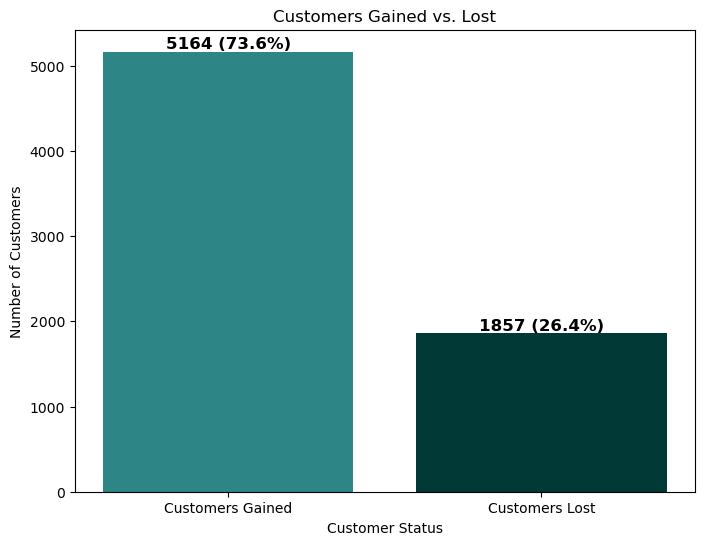

In [407]:
import matplotlib.pyplot as plt

# Calculate customers gained and lost
customers_gained = ConTel_df[ConTel_df['Churn'] == 'No'].shape[0]
customers_lost = ConTel_df[ConTel_df['Churn'] == 'Yes'].shape[0]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Correct usage of plt.figure()
plt.bar(['Customers Gained', 'Customers Lost'], [customers_gained, customers_lost], color=['#2d8685', '#003935'])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.title('Customers Gained vs. Lost')

# Add percentage labels
total_customers = customers_gained + customers_lost
for i, v in enumerate([customers_gained, customers_lost]):
    plt.text(i, v, f"{v} ({v/total_customers*100:.1f}%)", ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot
plt.show()


In [ ]:
#Observation
#Majority of customers are retained (represented by the "Customers Gained" bar),
#indicates that the business is able to keep a substantial portion of its customer base.
#A notable proportion of customers are lost ,indicating while retention efforts may be effective, 
#there is still a significant churn that needs to be addressed.

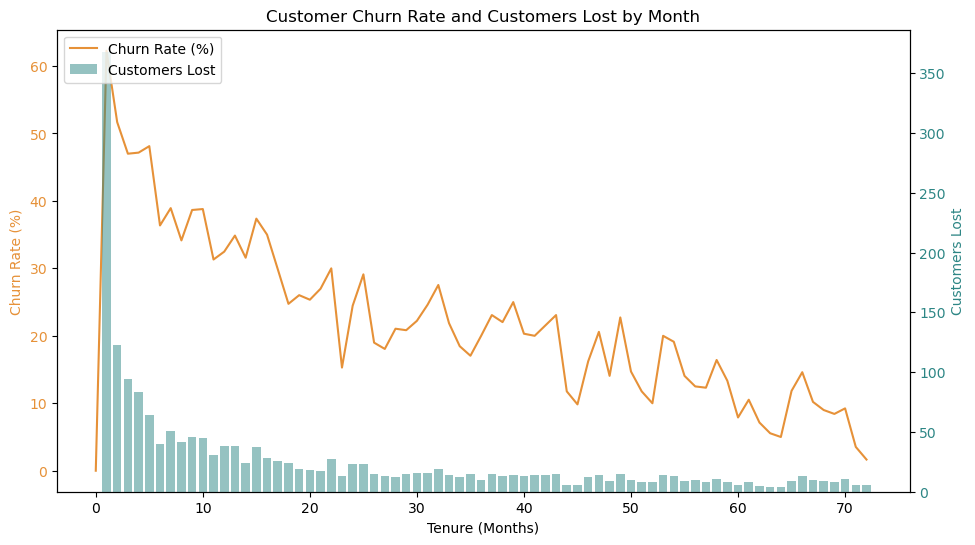

Overall Churn Rate: 26.45%
Highest Churn Rate Month: 1 (62.27%)


In [409]:
#Customer's churn rate by month analyzing customers lost and revenue 

# churn rate by month
ConTel_df['Churn_Binary'] = ConTel_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
churn_by_month = ConTel_df.groupby('tenure')['Churn_Binary'].mean().reset_index()

# number of customers lost each month
customers_lost = ConTel_df[ConTel_df['Churn'] == 'Yes'].groupby('tenure')['Churn'].count().reset_index()

# Revenue lost each month
revenue_lost = ConTel_df[ConTel_df['Churn'] == 'Yes'].groupby('tenure')['MonthlyCharges'].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(11, 6))

ax1.plot(churn_by_month['tenure'], churn_by_month['Churn_Binary'] * 100, color='#e69138', label='Churn Rate (%)')
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Churn Rate (%)', color='#e69138')
ax1.tick_params(axis='y', labelcolor='#e69138')


ax2 = ax1.twinx()
ax2.bar(customers_lost['tenure'], customers_lost['Churn'], color='#2d8685', alpha=0.5, label='Customers Lost')
ax2.set_ylabel('Customers Lost', color='#2d8685')
ax2.tick_params(axis='y', labelcolor='#2d8685')


plt.title('Customer Churn Rate and Customers Lost by Month')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


plt.show()

# statistics
total_churn_rate = ConTel_df['Churn_Binary'].mean() * 100
print(f"Overall Churn Rate: {total_churn_rate:.2f}%")

highest_churn_month = churn_by_month.loc[churn_by_month['Churn_Binary'].idxmax()]
print(f"Highest Churn Rate Month: {int(highest_churn_month['tenure'])} ({highest_churn_month['Churn_Binary'] * 100:.2f}%)")


In [411]:
ConTel_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

#Data Pre-processing

#Encoding

In [413]:
binary_mapping = {'No': 0, 'Yes': 1, 'No phone service': 0}

# **1. Define categorical columns including tenure, churn, and MultipleLines**
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                    'PhoneService', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Churn']

# Replace binary categorical features using mapping
ConTel_df_encoded = ConTel_df[categorical_cols].replace(binary_mapping)

# Ensure 'MultipleLines' handles 'No phone service' correctly
ConTel_df_encoded['MultipleLines'] = ConTel_df['MultipleLines'].replace(binary_mapping)

# Assuming tenure is intended to be kept as is
# If you need to categorize it into ranges, you could uncomment the below:
# ConTel_df_encoded['tenure'] = pd.cut(ConTel_df['tenure'], bins=[0, 12, 24, 36, 48, 60], labels=[1, 2, 3, 4, 5])

# Encode 'gender' using integer mapping (assuming Male=1 and Female=0)
ConTel_df_encoded['gender'] = ConTel_df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# One-hot encode multi-category features
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
ConTel_df_multi_encoded = pd.get_dummies(ConTel_df[multi_cat_cols], drop_first=True)

# Convert Boolean columns to integers
ConTel_df_multi_encoded = ConTel_df_multi_encoded.astype(int)

# Concatenate binary encoded DataFrame and one-hot encoded DataFrame
ConTel_df_encoded = pd.concat([ConTel_df_encoded, ConTel_df_multi_encoded], axis=1)

# Display the first few rows of the final encoded DataFrame
ConTel_df_encoded.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   StreamingTV  StreamingMovies  Churn  InternetService_Fiber optic  \
0            0                0      0                            0   
1            0                0      0                            0   
2            0                0      1                            0   
3            0                0      0                            0   
4            0                0      1                            1   

   InternetService_No  Contract_One year  Contract_Two year  \
0                   0                  0                  0   
1                   0                  1                  0   
2                   0                  0                  0   
3                   0                  1                  0   
4                   0                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 21 columns]

In [415]:
#Numerical columns
numerical_cols = ['MonthlyCharges', 'TotalCharges']
int_df = ConTel_df[numerical_cols]
int_df.head()

MonthlyCharges  TotalCharges
0           29.85         29.85
1           56.95       1889.50
2           53.85        108.15
3           42.30       1840.75
4           70.70        151.65

In [417]:
# Combine the two dataframes
ConTel_df_final = pd.concat([ConTel_df_encoded, int_df], axis=1)

# Display the first few rows of the combined dataframe
ConTel_df_final.head(20)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0              0        1           0       1             0   
1        1              0        0           0      34             1   
2        1              0        0           0       2             1   
3        1              0        0           0      45             0   
4        0              0        0           0       2             1   
5        0              0        0           0       8             1   
6        1              0        0           1      22             1   
7        0              0        0           0      10             0   
8        0              0        1           0      28             1   
9        1              0        0           1      62             1   
10       1              0        1           1      13             1   
11       1              0        0           0      16             1   
12       1              0        1           0      58             1   
13       1              0        0           0      49             1   
14       1              0        0           0      25             1   
15       0              0        1           1      69             1   
16       0              0        0           0      52             1   
17       1              0        0           1      71             1   
18       0              0        1           1      10             1   
19       0              0        0           0      21             1   

    MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  Churn  \
0               0               0             1                 0  ...      0   
1               0               1             0                 1  ...      0   
2               0               1             1                 0  ...      1   
3               0               1             0                 1  ...      0   
4               0               0             0                 0  ...      1   
5               1               0             0                 1  ...      1   
6               1               0             1                 0  ...      0   
7               0               1             0                 0  ...      0   
8               1               0             0                 1  ...      1   
9               0               1             1                 0  ...      0   
10              0               1             0                 0  ...      0   
11              0               0             0                 0  ...      0   
12              1               0             0                 1  ...      0   
13              1               0             1                 1  ...      1   
14              0               1             0                 1  ...      0   
15              1               1             1                 1  ...      0   
16              0               0             0                 0  ...      0   
17              1               1             0                 1  ...      0   
18              0               0             0                 1  ...      1   
19              0               0             1                 1  ...      0   

    InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                             0                   0                  0   
1                             0                   0                  1   
2                             0                   0                  0   
3                             0                   0                  1   
4                             1                   0                  0   
5                             1                   0                  0   
6                             1                   0                  0   
7                             0                   0                  0   
8                             1                   0                  0   
9                             0                  

In [203]:
ConTel_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   int64  
 1   SeniorCitizen                          7021 non-null   int64  
 2   Partner                                7021 non-null   int64  
 3   Dependents                             7021 non-null   int64  
 4   tenure                                 7021 non-null   int64  
 5   PhoneService                           7021 non-null   int64  
 6   MultipleLines                          7021 non-null   int64  
 7   OnlineSecurity                         7021 non-null   int64  
 8   OnlineBackup                           7021 non-null   int64  
 9   DeviceProtection                       7021 non-null   int64  
 10  TechSupport                            7021 non-null   int64  
 11  Streaming

In [419]:
ConTel_df_final.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  Churn  \
0              0               0             1                 0  ...      0   
1              0               1             0                 1  ...      0   
2              0               1             1                 0  ...      1   
3              0               1             0                 1  ...      0   
4              0               0             0                 0  ...      1   

   InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                            0                   0                  0   
1                            0                   0                  1   
2                            0                   0                  0   
3                            0                   0                  1   
4                            1                   0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  MonthlyCharges  \
0                               1                           0           29.85   
1                               0                           1           56.95   
2                               0                           1           53.85   
3                               0                           0           42.30   
4                               1                           0           70.70   

   TotalCharges  
0         29.85  
1       1889.50  
2        108.15  
3       1840.75  
4        151.65  

[5 rows x 23 columns]

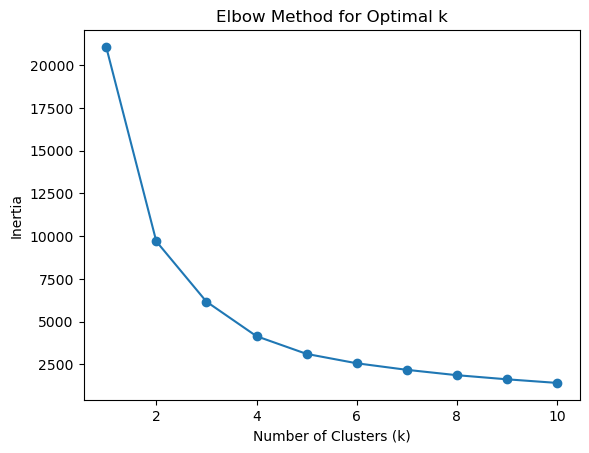

In [211]:
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  


# Feature Selection  
segmentation_features = ['MonthlyCharges', 'TotalCharges', 'tenure']  

# Check if the necessary columns exist in the DataFrame  
if not all(feature in ConTel_df.columns for feature in segmentation_features):  
    raise ValueError("One or more segmentation features are missing from the DataFrame")  

# Check for non-numeric values and convert them  
for feature in segmentation_features:  
    # Convert to numeric, setting errors='coerce' will turn non-convertible values to NaN  
    ConTel_df[feature] = pd.to_numeric(ConTel_df[feature], errors='coerce')  

# Drop rows with NaN values in the selected features  
X = ConTel_df[segmentation_features].dropna()  


# Standardization   
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

# Determine Optimal Number of Clusters   
inertia = []  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(X_scaled)  
    inertia.append(kmeans.inertia_)  

# Plotting Elbow method  
plt.plot(range(1, 11), inertia, marker='o')  
plt.title('Elbow Method for Optimal k')  
plt.xlabel('Number of Clusters (k)')  
plt.ylabel('Inertia')  
plt.show()



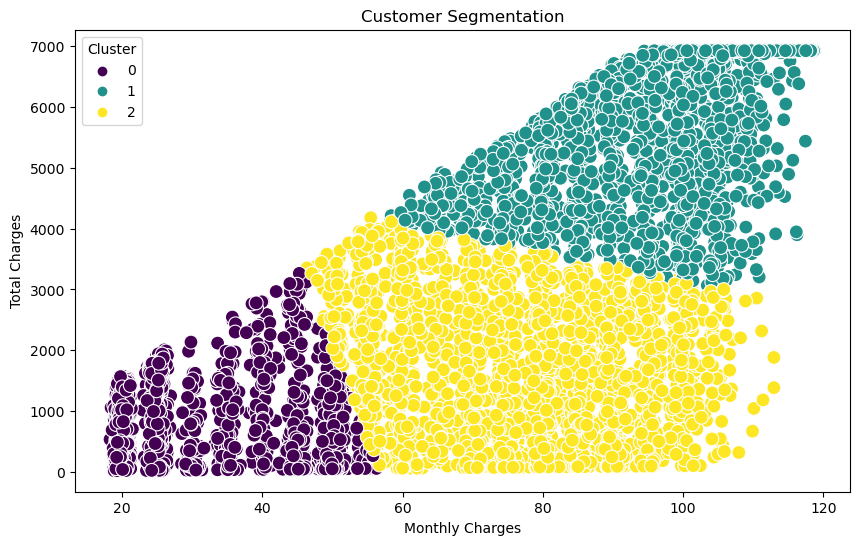

In [421]:
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans  

# Check for and handle missing values  
if ConTel_df[['MonthlyCharges', 'TotalCharges']].isnull().any().any():  
    print("Missing values detected. Handling missing values...")  
    
    # Option 1: Drop rows with NaN values  
    ConTel_df.dropna(subset=['MonthlyCharges', 'TotalCharges'], inplace=True)  
    
   
# Extract relevant features for clustering  
X = ConTel_df[['MonthlyCharges', 'TotalCharges']]  

# Scale the features  
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)  

# Set the number of clusters  
k = 3  

# Perform Clustering  
kmeans = KMeans(n_clusters=k, random_state=42)  
ConTel_df['Cluster'] = kmeans.fit_predict(X_scaled)  

# Analyze and Visualize Clusters  
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Cluster', data=ConTel_df, palette='viridis', s=100)  
plt.title('Customer Segmentation')  
plt.xlabel('Monthly Charges')  
plt.ylabel('Total Charges')  
plt.legend(title='Cluster')  
plt.show()

Cluster 0:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  Churn_Binary  \
count    2454.000000  2454.000000     2454.000000   2454.000000   2454.000000   
mean        0.068460    25.142217       29.279319    667.997963      0.172779   
std         0.252585    23.270046       11.830429    633.769649      0.378133   
min         0.000000     0.000000       18.250000     18.800000      0.000000   
25%         0.000000     4.000000       20.000000    122.175000      0.000000   
50%         0.000000    17.000000       24.250000    466.875000      0.000000   
75%         0.000000    44.000000       40.300000   1087.125000      0.000000   
max         1.000000    72.000000       56.250000   3264.450000      1.000000   

       Cluster  
count   2454.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


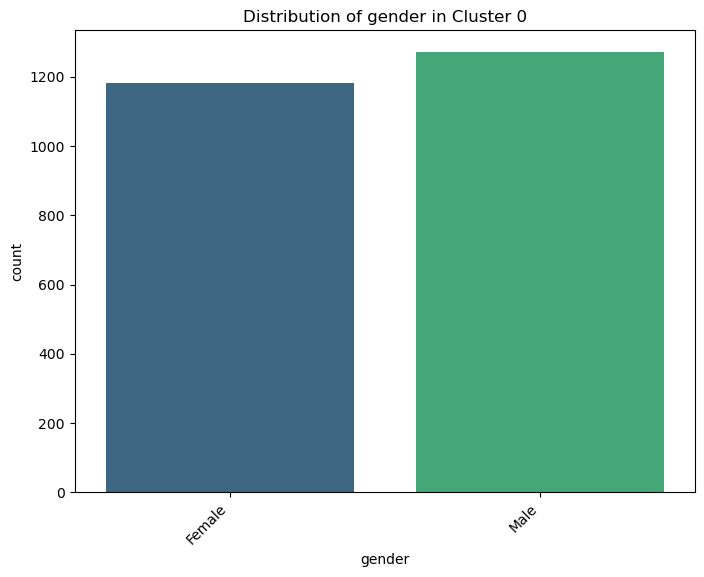

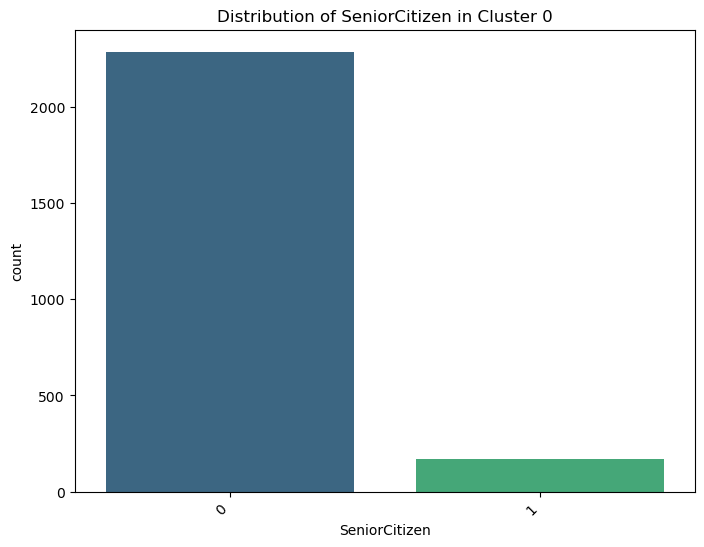

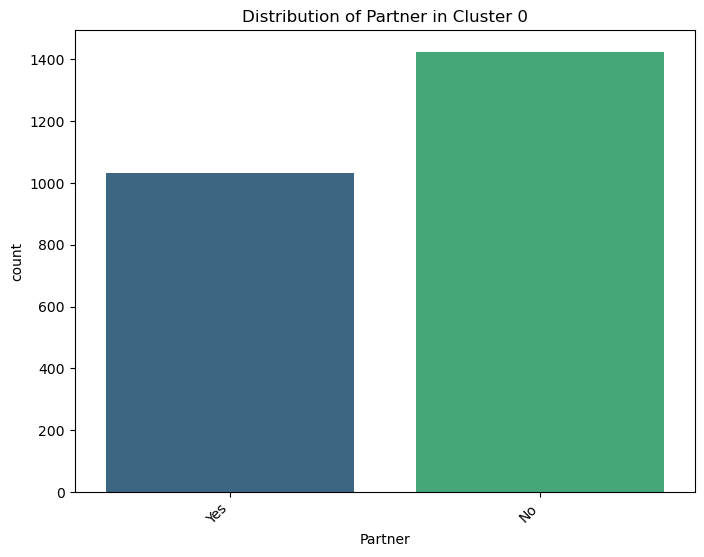

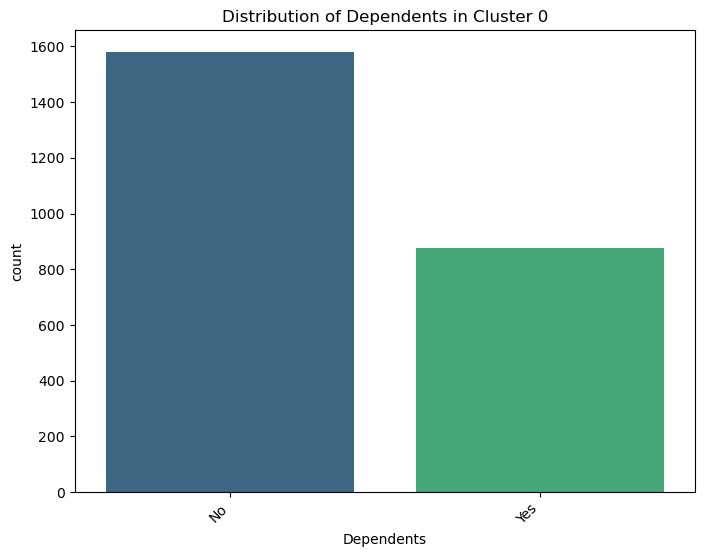

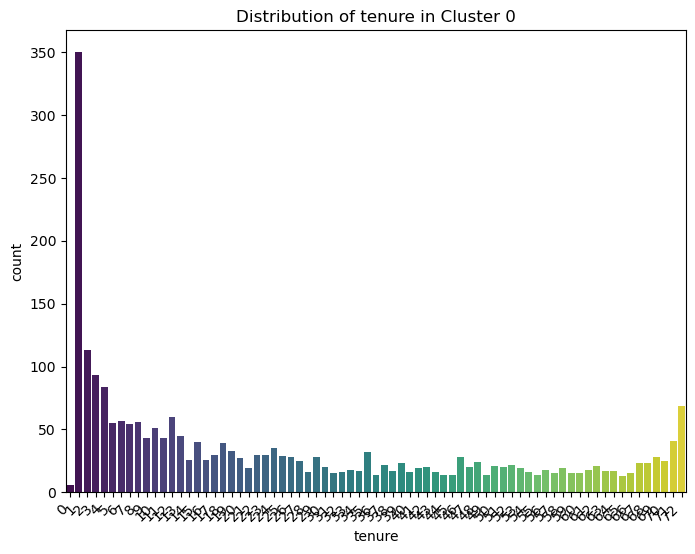

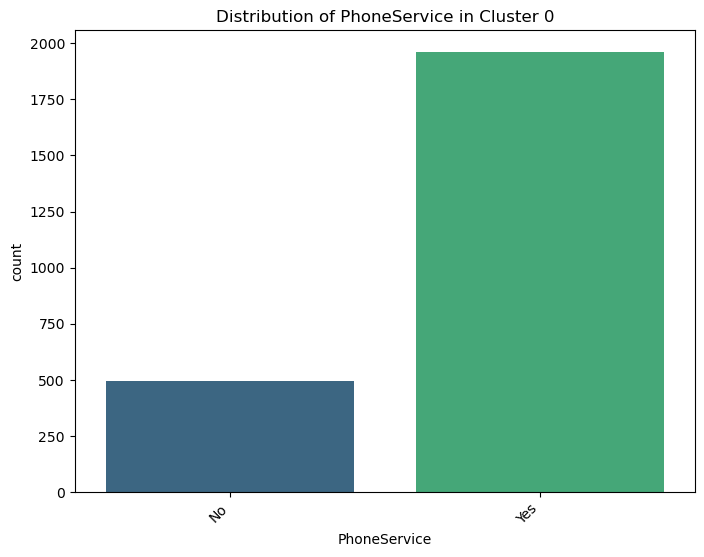

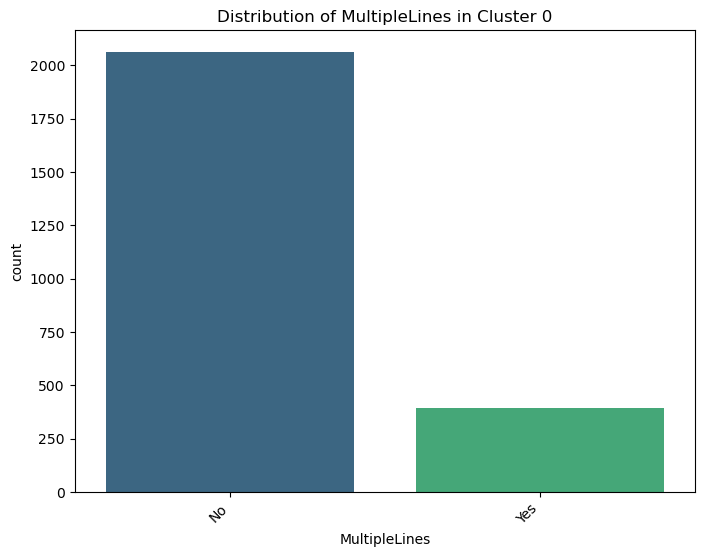

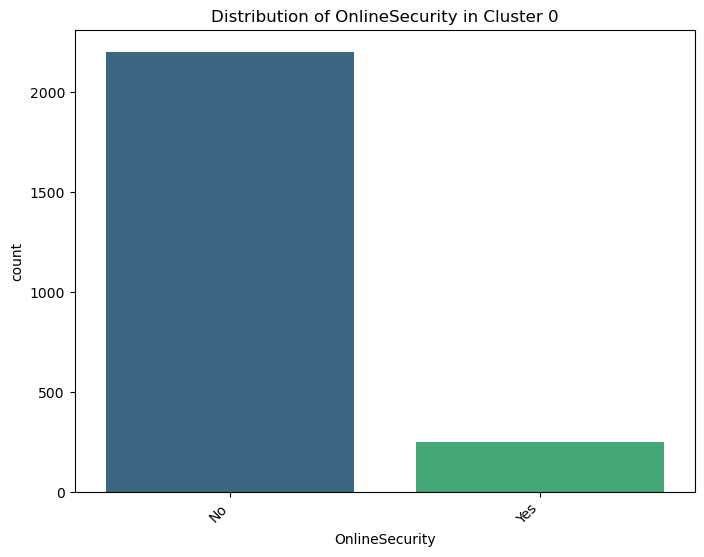

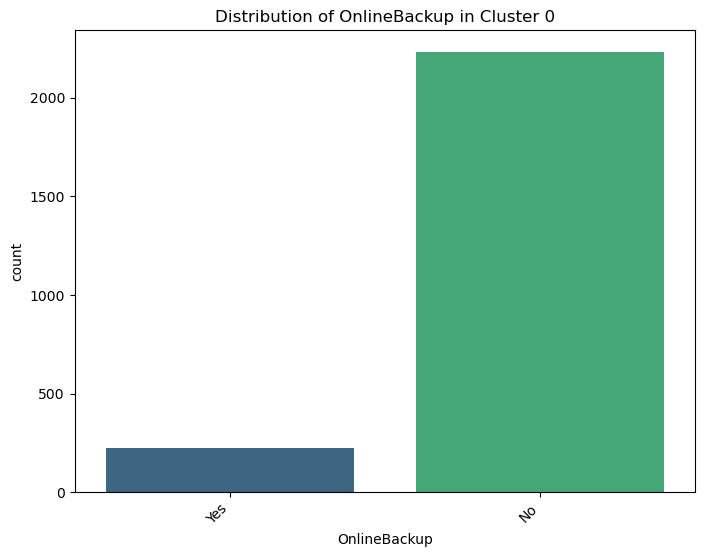

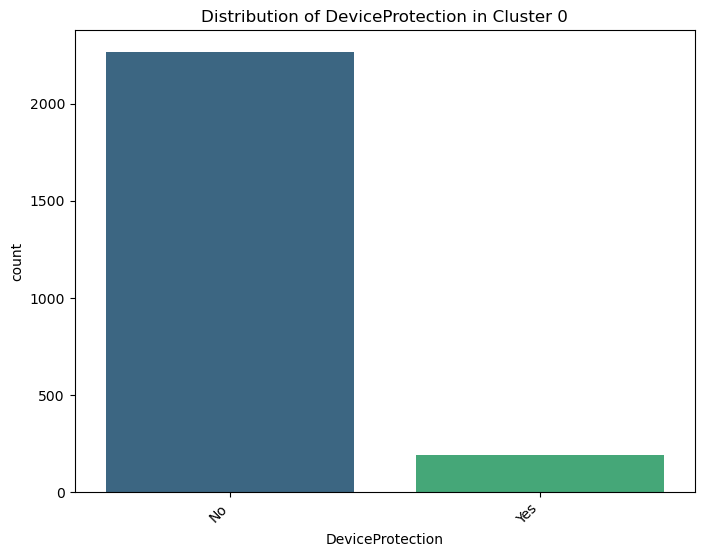

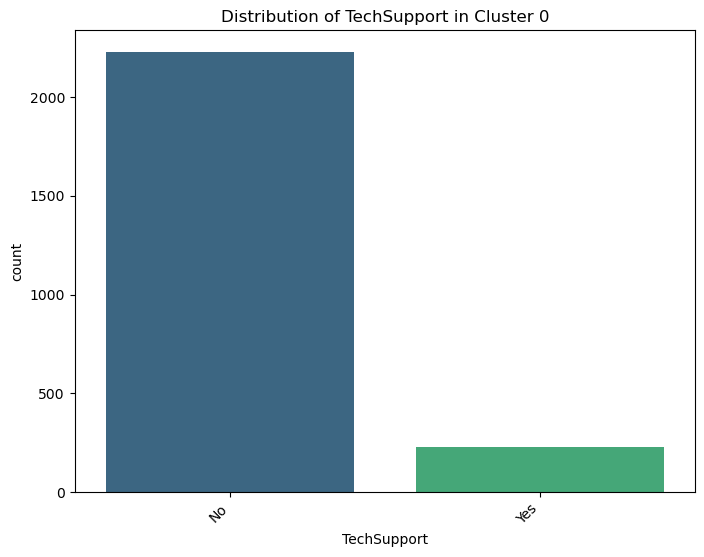

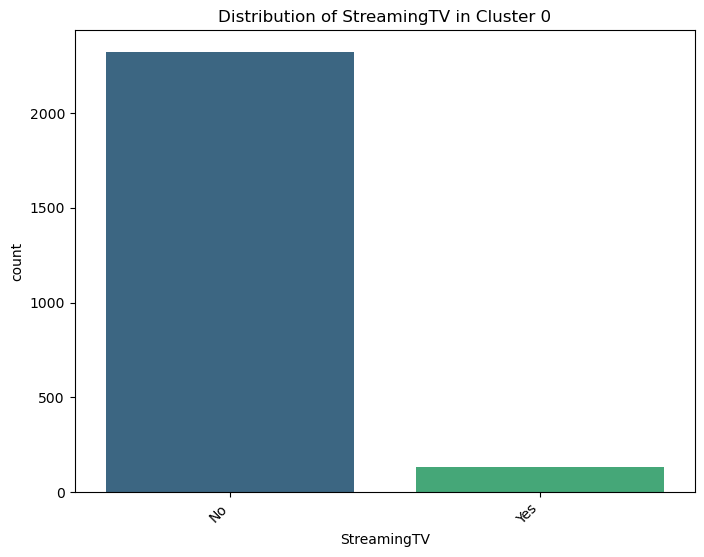

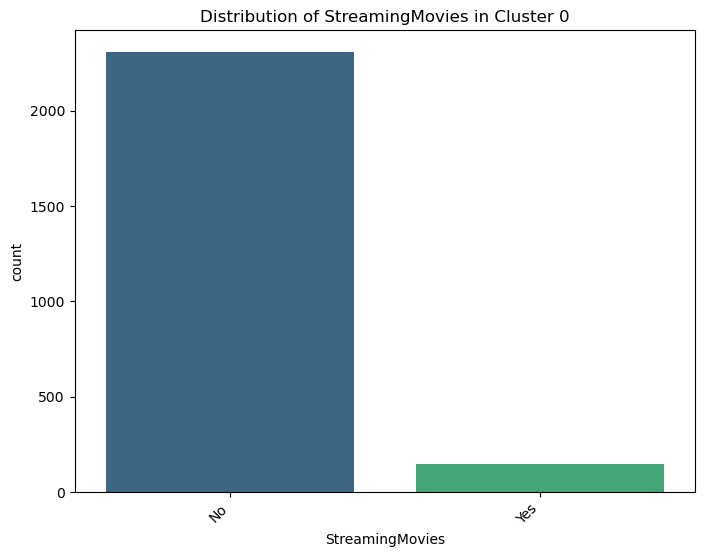

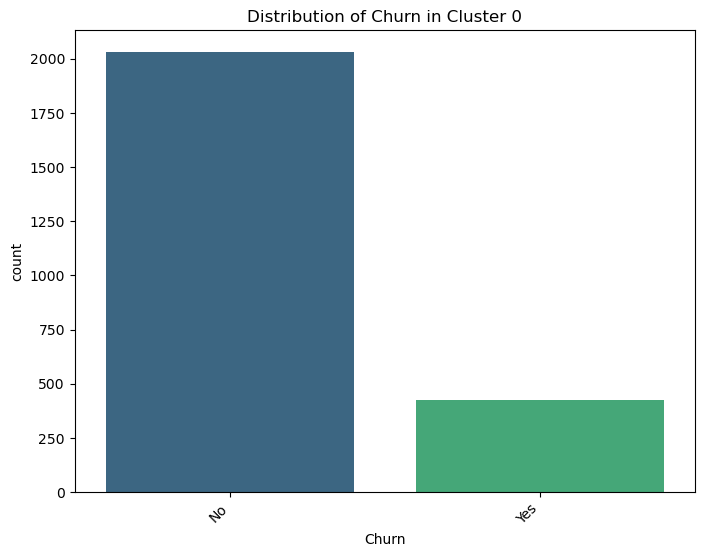

Cluster 1:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  Churn_Binary  \
count    1852.000000  1852.000000     1852.000000   1852.000000   1852.000000   
mean        0.222462    59.441685       94.497111   5468.569357      0.160367   
std         0.416012    11.376868       13.615271   1125.838488      0.367045   
min         0.000000    28.000000       58.250000   3046.050000      0.000000   
25%         0.000000    51.000000       84.800000   4513.412500      0.000000   
50%         0.000000    62.000000       96.225000   5511.150000      0.000000   
75%         0.000000    70.000000      105.200000   6591.850000      0.000000   
max         1.000000    72.000000      118.750000   6925.900000      1.000000   

       Cluster  
count   1852.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  


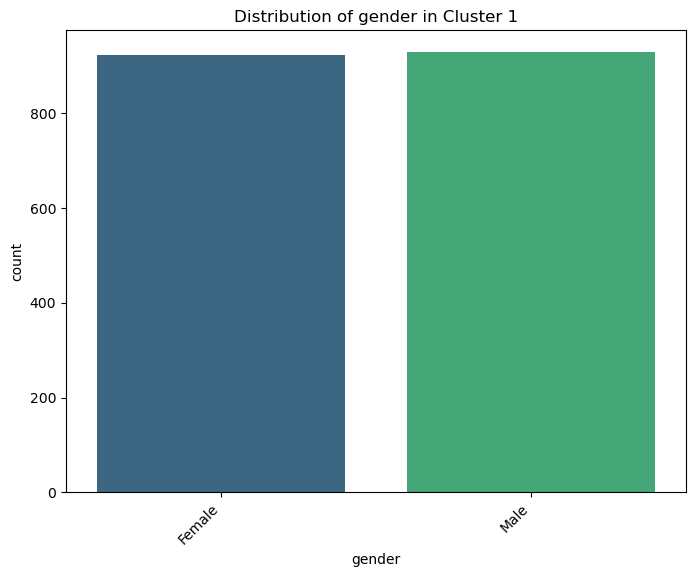

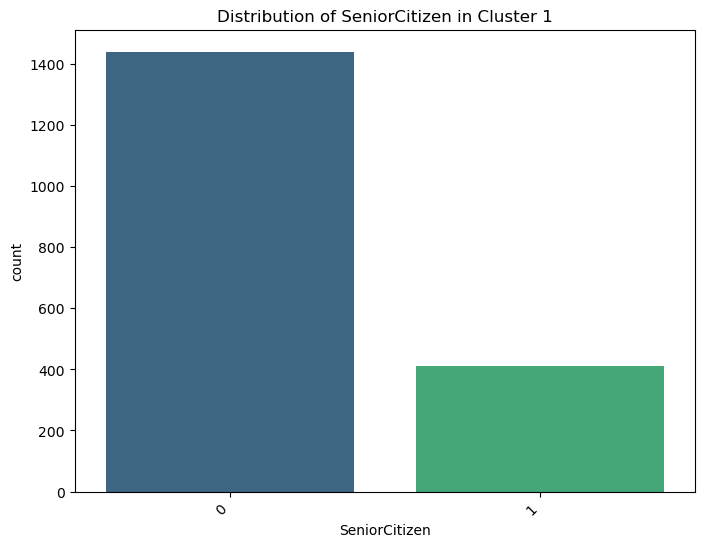

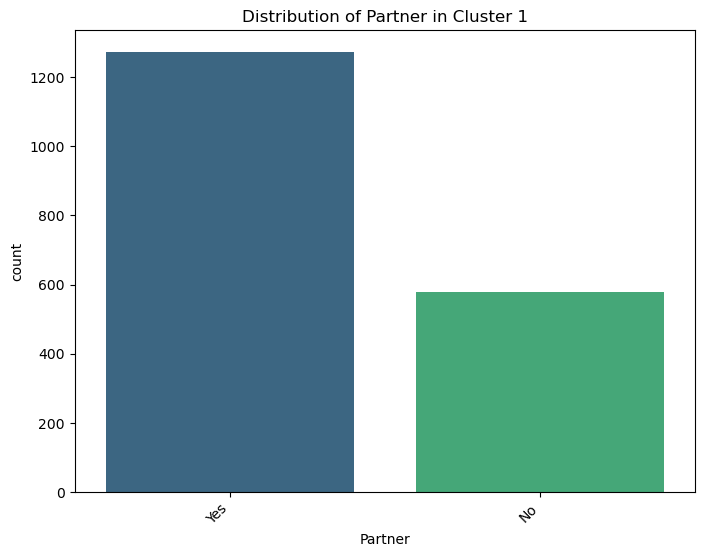

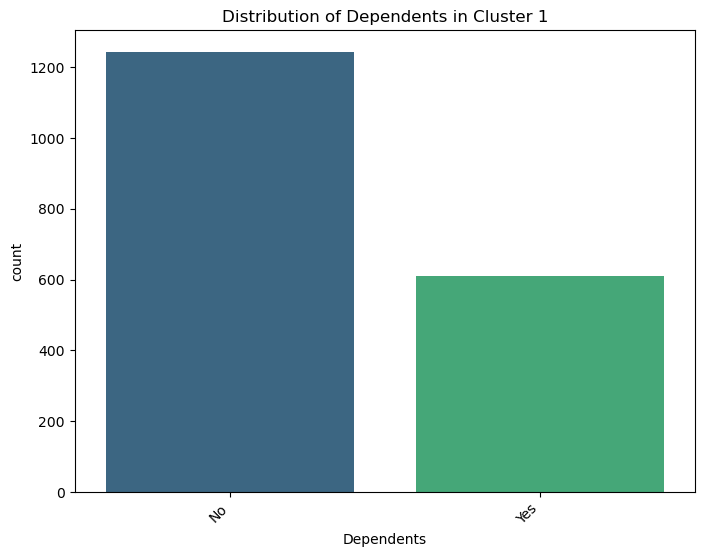

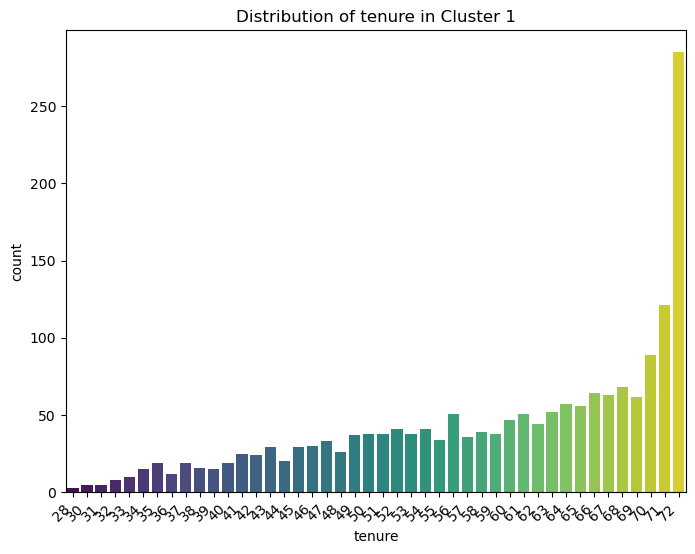

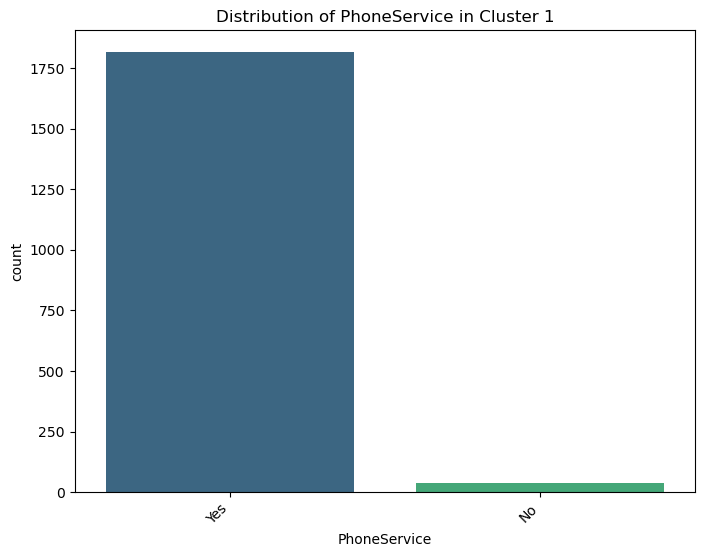

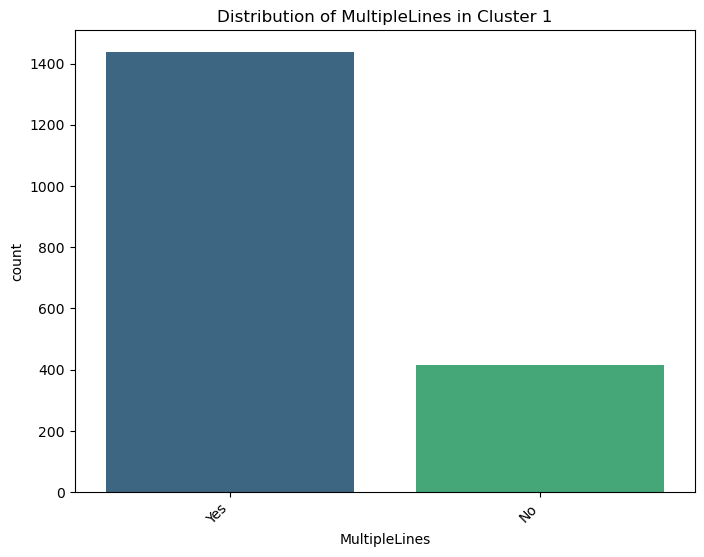

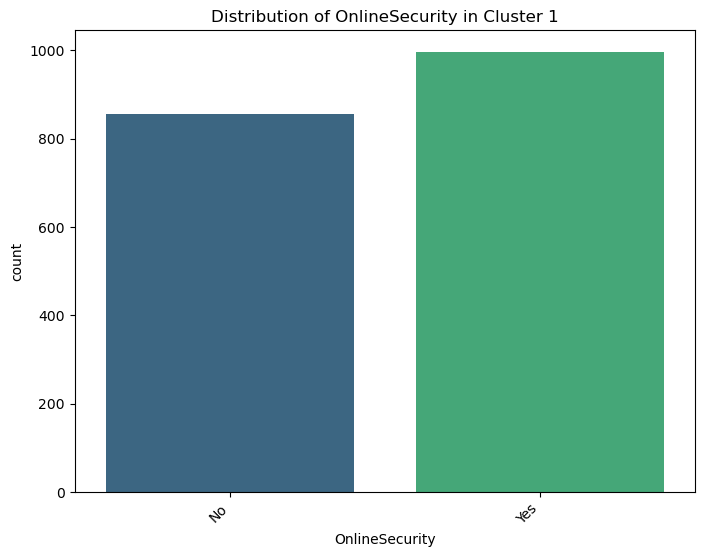

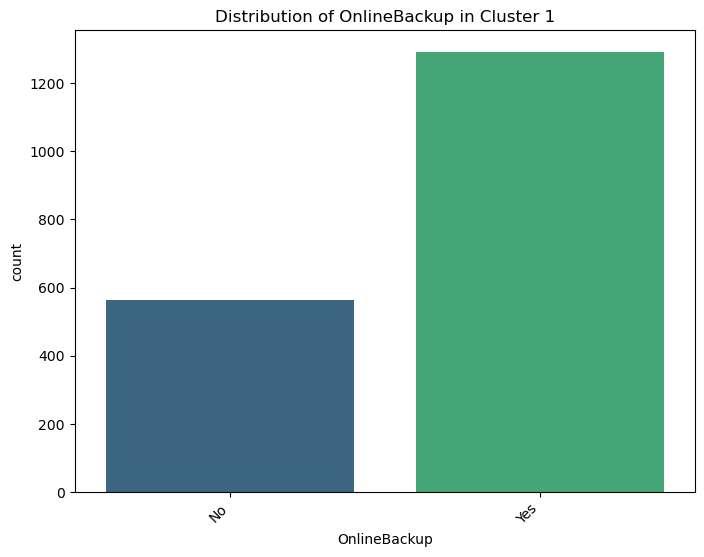

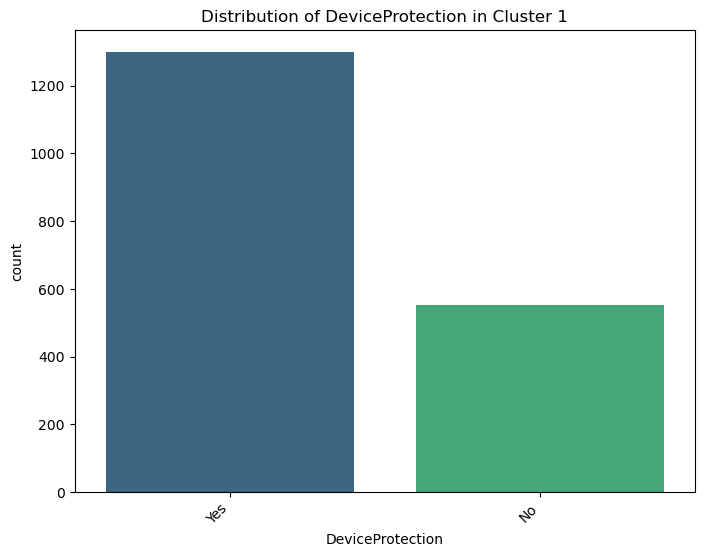

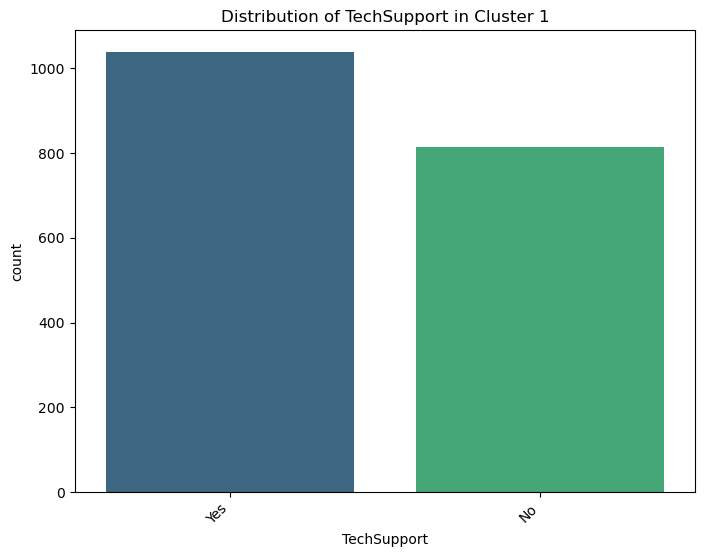

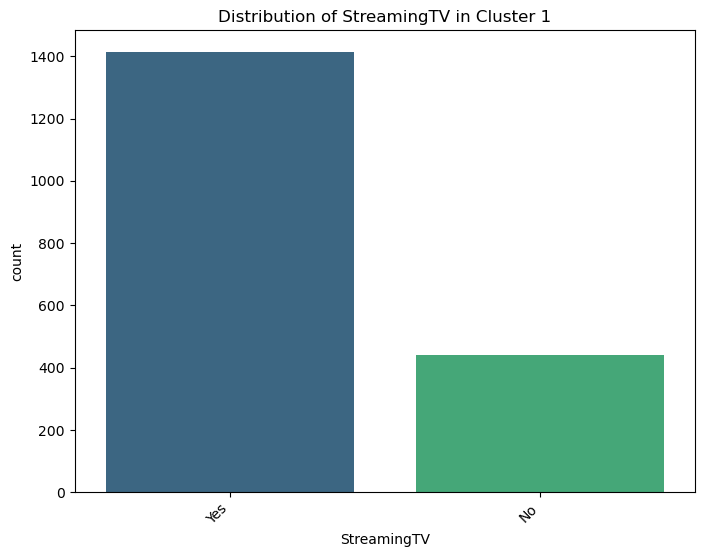

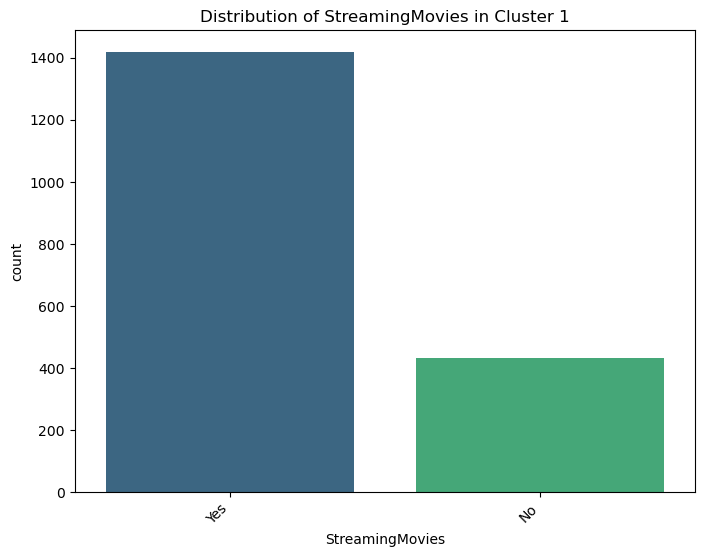

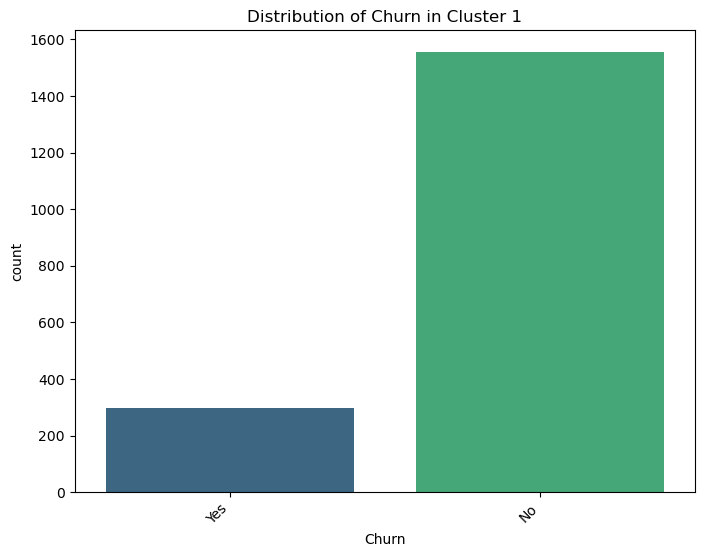

Cluster 2:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges  Churn_Binary  \
count    2715.000000  2715.000000     2715.000000   2715.000000   2715.000000   
mean        0.206630    20.693554       76.782707   1495.946492      0.418416   
std         0.404962    17.193950       14.122073   1107.337149      0.493390   
min         0.000000     0.000000       46.350000     59.200000      0.000000   
25%         0.000000     6.000000       66.275000    486.050000      0.000000   
50%         0.000000    17.000000       75.900000   1337.450000      0.000000   
75%         0.000000    31.000000       87.150000   2393.750000      1.000000   
max         1.000000    72.000000      112.950000   4179.200000      1.000000   

       Cluster  
count   2715.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0  


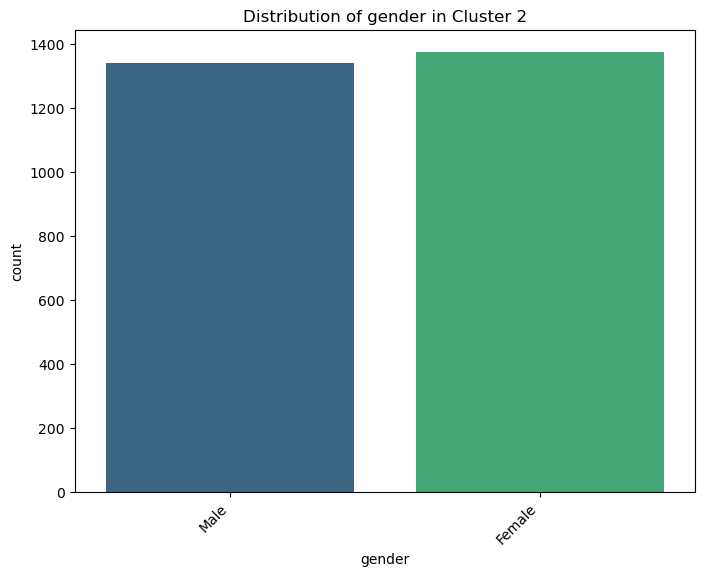

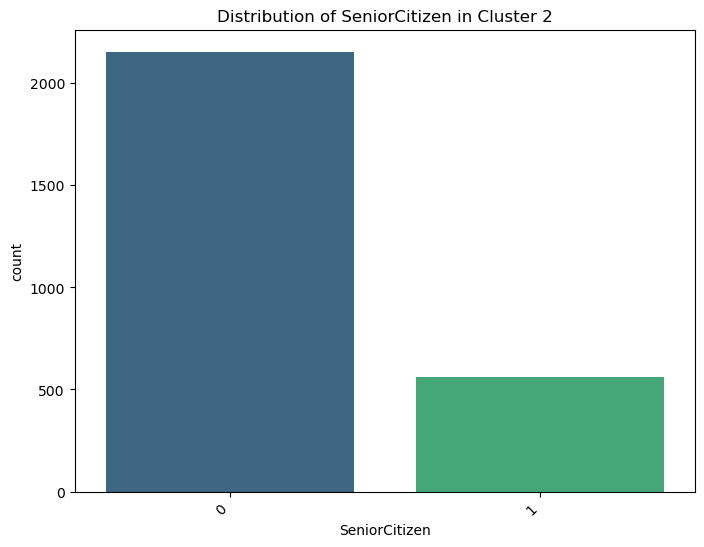

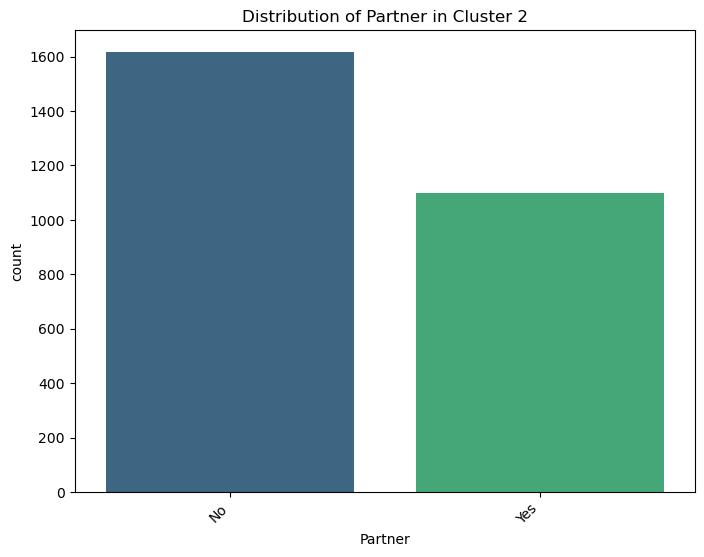

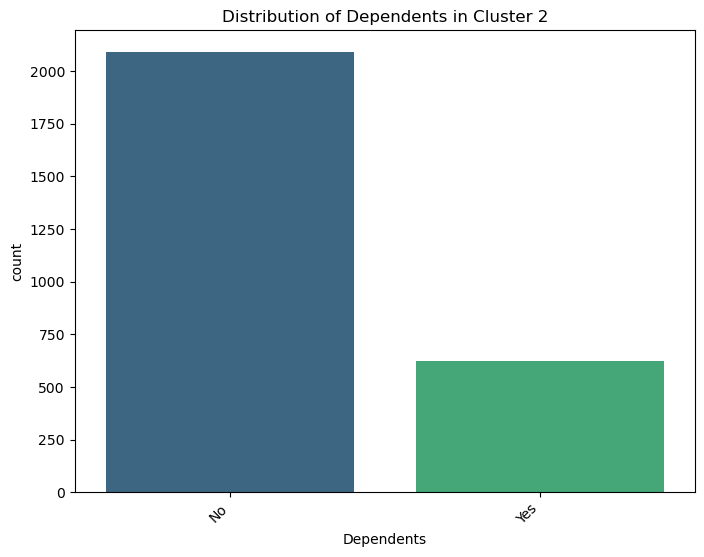

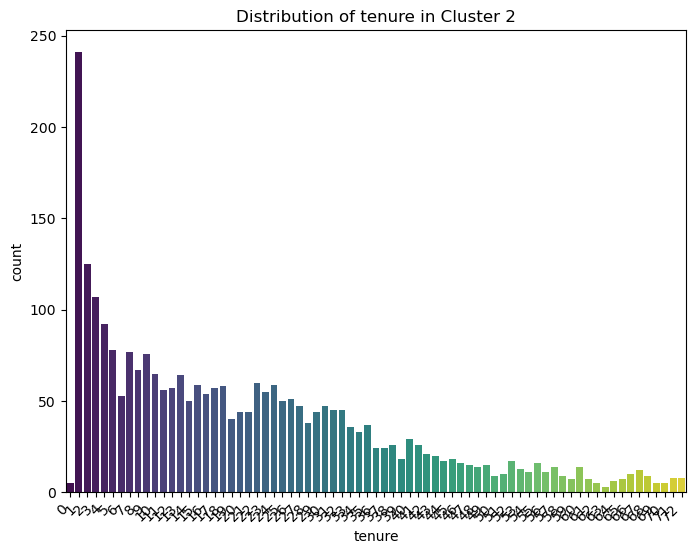

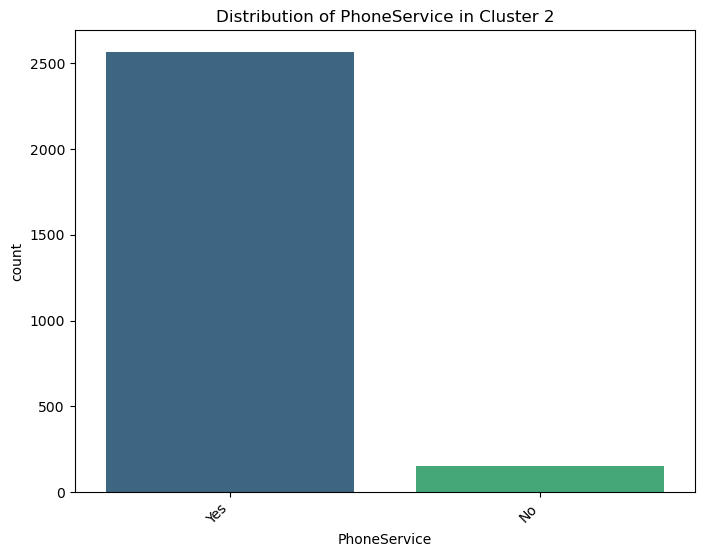

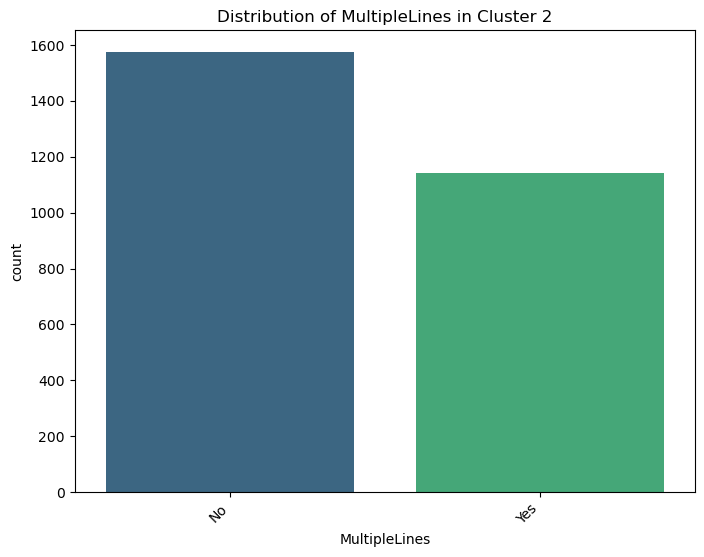

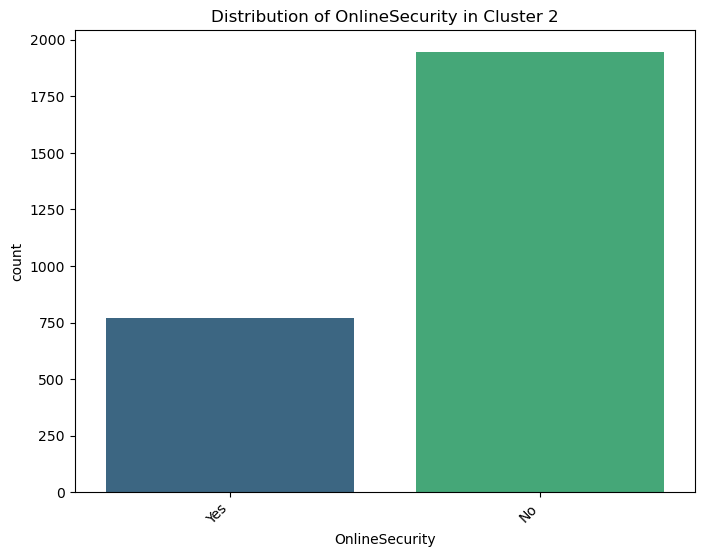

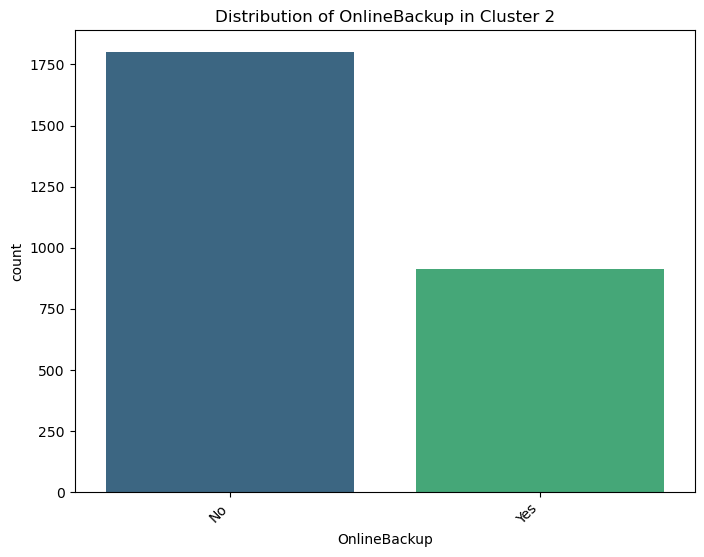

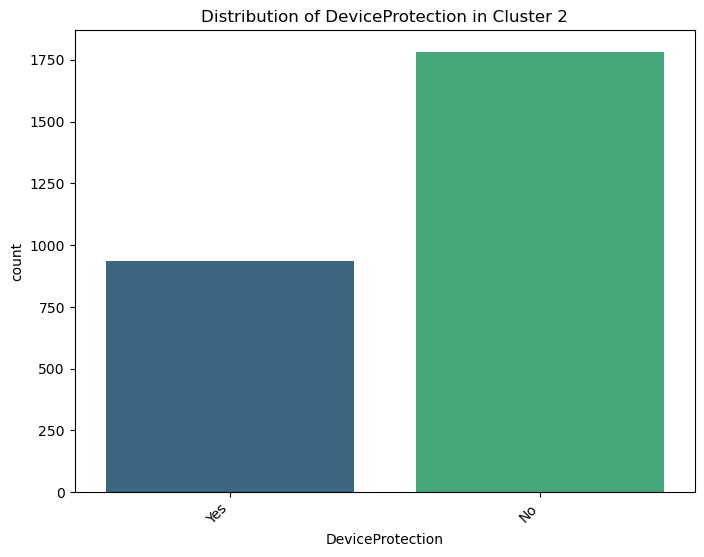

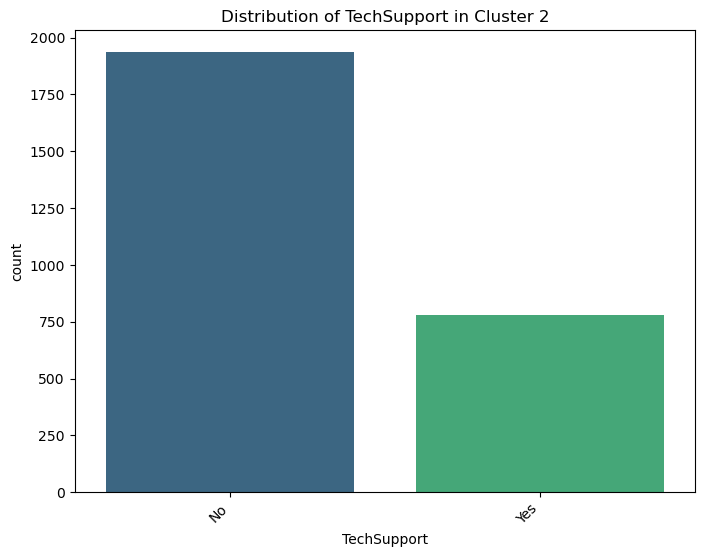

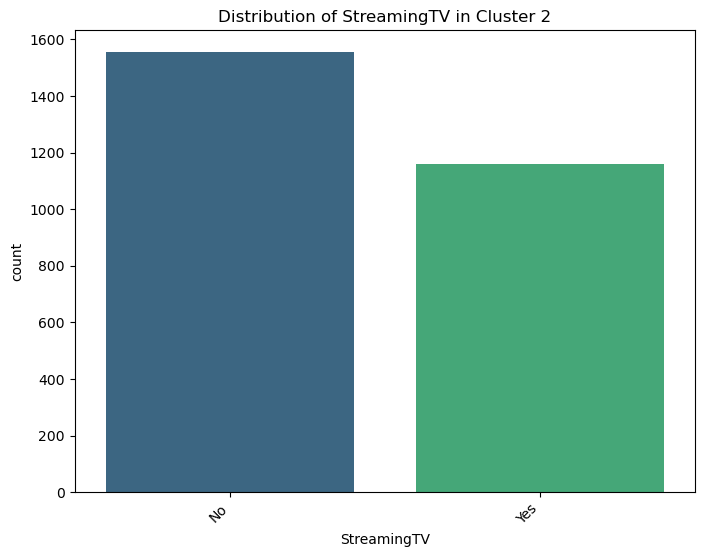

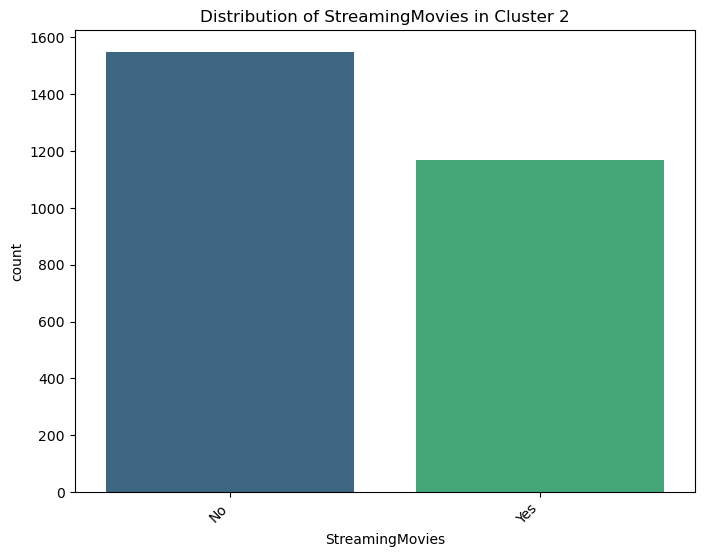

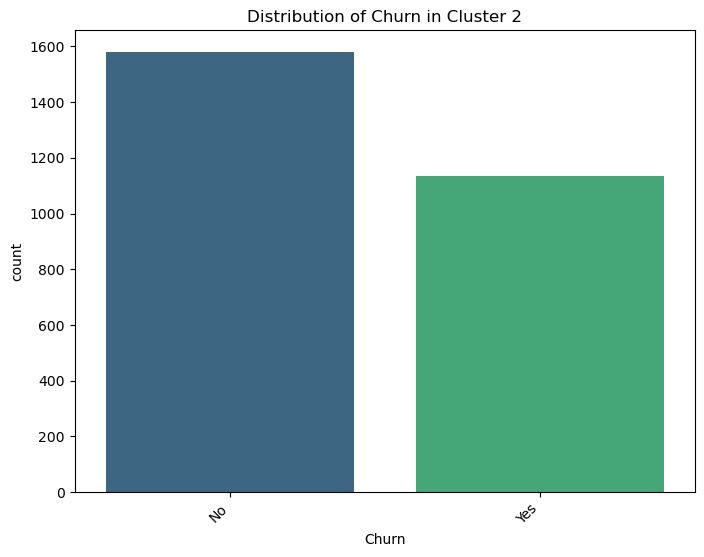

AttributeError: 'numpy.int32' object has no attribute 'startswith'

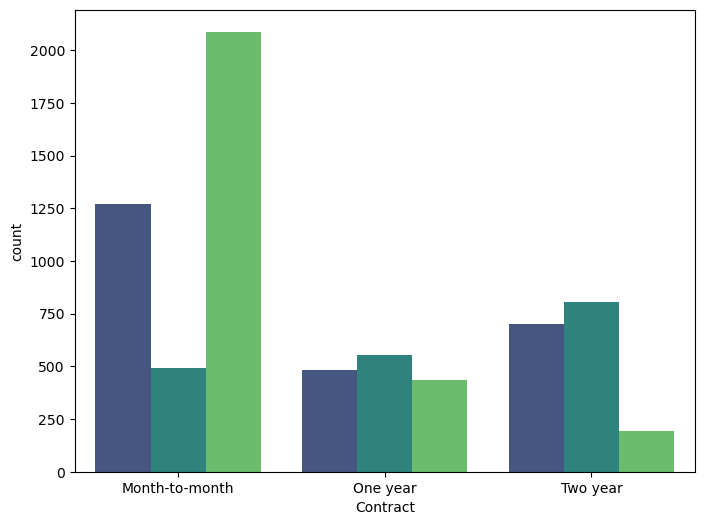

In [423]:
#Analyzing the characteristics of each cluster (e.g., demographics, contract types, service usage patterns and plot

# Analyze cluster characteristics
for cluster in range(k):
  cluster_data = ConTel_df[ConTel_df['Cluster'] == cluster]
  print(f"Cluster {cluster}:")
  print(cluster_data.describe())

  # Analyze categorical features
  for feature in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=cluster_data, palette='viridis')
    plt.title(f"Distribution of {feature} in Cluster {cluster}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example for contract types:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Cluster', data=ConTel_df, palette='viridis')
plt.title("Contract Types Across Clusters")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:

# Analyze cluster characteristics  
for cluster in range(k):  
    cluster_data = ConTel_df[ConTel_df['Cluster'] == cluster]  
    print(f"Cluster {cluster}:")  
    print(cluster_data.describe())  

    # Analyze categorical features  
    for feature in categorical_cols:  
        plt.figure(figsize=(8, 6))  
        sns.countplot(x=feature, data=cluster_data, palette='viridis')  
        plt.title(f"Distribution of {feature} in Cluster {cluster}")  
        plt.xticks(rotation=45, ha='right')  
        plt.show()  

# contract types across all clusters  
plt.figure(figsize=(8, 6))  
sns.countplot(x='Contract', hue='Cluster', data=ConTel_df, palette='viridis')  
plt.title("Contract Types Across Clusters")  
plt.xticks(rotation=45, ha='right')  
plt.show()

In [ ]:
##Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [426]:
X = ConTel_df_final.drop('Churn', axis=1)
y = ConTel_df_final['Churn']

In [428]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [430]:
X.head() 

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   StreamingMovies  InternetService_Fiber optic  InternetService_No  \
0                0                            0                   0   
1                0                            0                   0   
2                0                            0                   0   
3                0                            0                   0   
4                0                            1                   0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  
0                           0           29.85         29.85  
1                           1           56.95       1889.50  
2                           1           53.85        108.15  
3                           0           42.30       1840.75  
4                           0           70.70        151.65  

[5 rows x 22 columns]

In [432]:
# Length of test data
print("Length of test data:", len(X_test))

print("Length of train data:", len(X_train))

Length of test data: 2107
Length of train data: 4914


In [434]:
# Length of entire dataset
print("Length of entire dataset:", len(ConTel_df_final))

print("Train + Test == Entire Dataset:", (len(X_train) + len(X_test)) == len(ConTel_df_final))

Length of entire dataset: 7021
Train + Test == Entire Dataset: True


In [436]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1633       0              0        0           0       1             1   
4083       0              1        1           0      68             1   
1885       1              0        1           1      24             1   
4706       0              0        0           0       1             1   
1615       0              0        1           0      49             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1633              0               0             0                 0  ...   
4083              1               0             1                 0  ...   
1885              0               1             1                 0  ...   
4706              0               0             0                 0  ...   
1615              0               0             0                 0  ...   

      StreamingMovies  InternetService_Fiber optic  InternetService_No  \
1633                0                            0                   0   
4083                1                            1                   0   
1885                1                            0                   0   
4706                0                            0                   0   
1615                0                            0                   1   

      Contract_One year  Contract_Two year  \
1633                  0                  0   
4083                  0                  0   
1885                  0                  0   
4706                  0                  0   
1615                  1                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1633                                      0                               1   
4083                                      0                               1   
1885                                      1                               0   
4706                                      0                               0   
1615                                      0                               0   

      PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  
1633                           0           43.80         43.80  
4083                           0          100.20       6851.65  
1885                           0           70.30       1706.45  
4706                           1           44.45         44.45  
1615                           0           20.05        923.10  

[5 rows x 22 columns]

In [438]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3918       1              0        1           1      20             1   
2467       1              0        1           1      49             1   
2885       1              1        0           0      67             1   
3770       0              0        1           0      57             1   
3753       1              0        0           0       1             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3918              0               0             0                 0  ...   
2467              1               0             0                 0  ...   
2885              1               1             1                 1  ...   
3770              0               0             0                 0  ...   
3753              0               0             0                 0  ...   

      StreamingMovies  InternetService_Fiber optic  InternetService_No  \
3918                1                            1                   0   
2467                1                            1                   0   
2885                1                            1                   0   
3770                0                            0                   1   
3753                0                            0                   0   

      Contract_One year  Contract_Two year  \
3918                  0                  0   
2467                  1                  0   
2885                  0                  1   
3770                  0                  1   
3753                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3918                                      0                               1   
2467                                      0                               1   
2885                                      1                               0   
3770                                      0                               0   
3753                                      0                               0   

      PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  
3918                           0           90.20       1776.55  
2467                           0           97.95       4917.90  
2885                           0          116.10       6925.90  
3770                           0           19.90       1115.60  
3753                           1           29.15         29.15  

[5 rows x 22 columns]

In [440]:
ConTel_df_final.replace('No internet service', 0, inplace=True)
ConTel_df_final.head(30)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0              0        1           0       1             0   
1        1              0        0           0      34             1   
2        1              0        0           0       2             1   
3        1              0        0           0      45             0   
4        0              0        0           0       2             1   
5        0              0        0           0       8             1   
6        1              0        0           1      22             1   
7        0              0        0           0      10             0   
8        0              0        1           0      28             1   
9        1              0        0           1      62             1   
10       1              0        1           1      13             1   
11       1              0        0           0      16             1   
12       1              0        1           0      58             1   
13       1              0        0           0      49             1   
14       1              0        0           0      25             1   
15       0              0        1           1      69             1   
16       0              0        0           0      52             1   
17       1              0        0           1      71             1   
18       0              0        1           1      10             1   
19       0              0        0           0      21             1   
20       1              1        0           0       1             0   
21       1              0        1           0      12             1   
22       1              0        0           0       1             1   
23       0              0        1           0      58             1   
24       1              0        1           1      49             1   
25       0              0        0           0      30             1   
26       1              0        1           1      47             1   
27       1              0        1           1       1             0   
28       1              0        1           0      72             1   
29       0              0        0           1      17             1   

    MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  Churn  \
0               0               0             1                 0  ...      0   
1               0               1             0                 1  ...      0   
2               0               1             1                 0  ...      1   
3               0               1             0                 1  ...      0   
4               0               0             0                 0  ...      1   
5               1               0             0                 1  ...      1   
6               1               0             1                 0  ...      0   
7               0               1             0                 0  ...      0   
8               1               0             0                 1  ...      1   
9               0               1             1                 0  ...      0   
10              0               1             0                 0  ...      0   
11              0               0             0                 0  ...      0   
12              1               0             0                 1  ...      0   
13              1               0             1                 1  ...      1   
14              0               1             0                 1  ...      0   
15              1               1             1                 1  ...      0   
16              0               0             0                 0  ...      0   
17              1               1             0                 1  ...      0   
18              0               0             0                 1  ...      1   
19              0               0             1                 1  ...      0   
20              0               0             0                 1  ...

##Model Training(Modeling)

In [236]:
#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [442]:
# Instantiate the models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dc = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
nb = GaussianNB()


In [444]:
print(X_train.dtypes)  
print(X_test.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
InternetService_Fiber optic                int32
InternetService_No                         int32
Contract_One year                          int32
Contract_Two year                          int32
PaymentMethod_Credit card (automatic)      int32
PaymentMethod_Electronic check             int32
PaymentMethod_Mailed check                 int32
MonthlyCharges      

In [446]:
result = {'Model':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1-Score':[]}

In [448]:
result = {'Model':[], 'Accuracy':[], 'Precision':[], 'Recall':[], 'F1-Score':[]}
results=pd.DataFrame(result)
results.head()

Empty DataFrame
Columns: [Model, Accuracy, Precision, Recall, F1-Score]
Index: []

In [450]:
from sklearn.model_selection import train_test_split
# Drop Churn
X = ConTel_df_final.drop('Churn', axis=1)
y = ConTel_df_final['Churn']

# Spliting  data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler 
mms = MinMaxScaler(feature_range=(0,1))

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test)

# Convert the scaled arrays back to DataFrames if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [452]:
# fitting the model with random
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Confusion Matrix:
 [[1384  172]
 [ 250  301]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.59       551

    accuracy                           0.80      2107
   macro avg       0.74      0.72      0.73      2107
weighted avg       0.79      0.80      0.79      2107



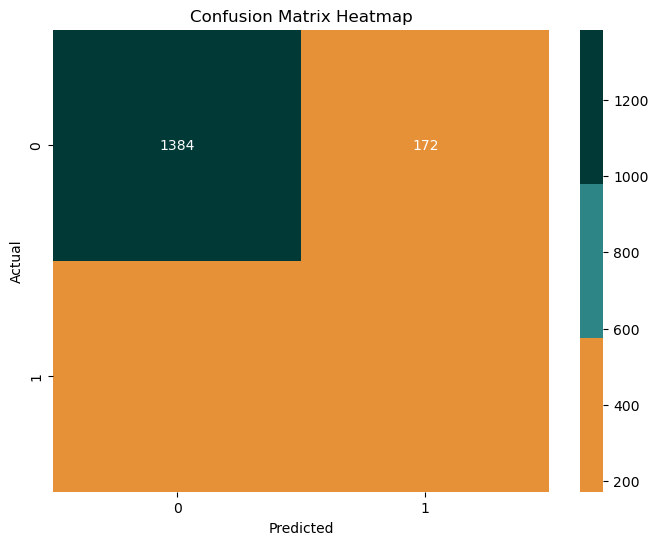

In [456]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#e69138', '#2d8685', '#003935'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
#Observation
#True Negatives (TN): 1385 - The number of instances correctly predicted as chrun.
#False Positives (FP): 171 - The number of instances incorrectly predicted churn (predicted class 1 when they are actually class 0).
#False Negatives (FN): 250 - The number of instances incorrectly predicted churn (predicted class 0 when they are actually class 1).
#True Positives (TP): 301 - The number of instances correctly predicted churn.
#Precicion
#Model is correct 85% of the time
# the model is less reliable when predicting the positive churn
#Model predicts on recall at 89% predicting no churn
#F1 score at 87% for churn and 59% model performs well on -ne churn struggles to balance between precision and positive recall

Confusion Matrix:
 [[1225  331]
 [ 148  403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1556
           1       0.55      0.73      0.63       551

    accuracy                           0.77      2107
   macro avg       0.72      0.76      0.73      2107
weighted avg       0.80      0.77      0.78      2107



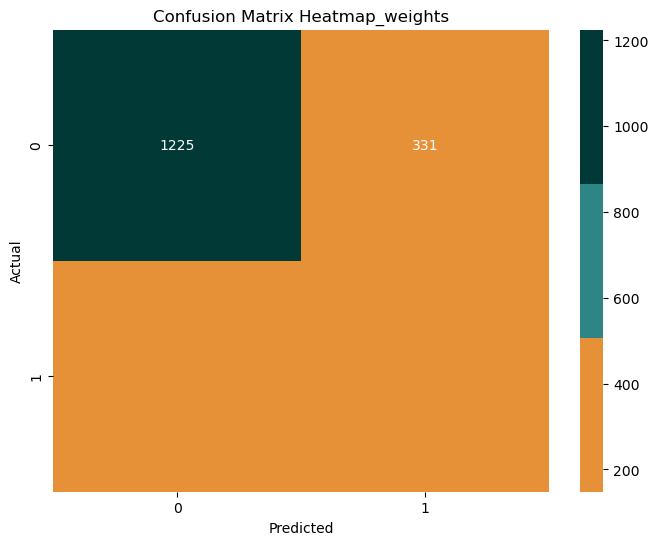

In [458]:
#Model Class Imbalance Weighted Cofusion matrix

class_weight ={0:1,1:2}
model=LogisticRegression(random_state=42, class_weight=class_weight) # Apply class weights here
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Calculating confusion matrix and store it in 'cm'
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=['#e69138', '#2d8685', '#003935'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap_weights')
plt.show()

In [ ]:
#Observation
#-The matrix shows that out of 1556 actual negatives (class 0), 
#1227 were correctly classified as negatives (True Negatives), 
#while 329 were incorrectly classified as positives (False Positives).
#Precision of 0.89 indicates that when the model predicts a negative class, 
#it is correct 89% of the time.
#There is a balance berween precision and recall

In [460]:
from sklearn.impute import SimpleImputer

In [463]:
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import SGDClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier

class_weight = 'balanced'
Classifiers= [[LogisticRegression(random_state=42,class_weight=class_weight),'Logistic Regression'],
             [ SGDClassifier(random_state=42,class_weight=class_weight),'SDG Classifier'],
             [ DecisionTreeClassifier(random_state=42,class_weight=class_weight),'Decision Tree Classifier'],
             [RandomForestClassifier(random_state=42,class_weight=class_weight),'Random Forest Classifier']] 

In [465]:
from sklearn.linear_model import LogisticRegression  
from sklearn.linear_model import SGDClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  

# Define class_weight variable here  
class_weight ={0:1,1:2}  # or define a specific dictionary if needed  

# List of classifiers  
Classifiers = [  
    [LogisticRegression(random_state=42, class_weight=class_weight), 'Logistic Regression'],  
    [SGDClassifier(random_state=42, class_weight=class_weight), 'SGD Classifier'],  
    [DecisionTreeClassifier(random_state=42, class_weight=class_weight), 'Decision Tree Classifier'],  
    [RandomForestClassifier(random_state=42, class_weight=class_weight), 'Random Forest Classifier'] 
]

In [ ]:
#Model Classifier and training

--- Logistic Regression ---
Confusion Matrix:
 [[1225  331]
 [ 148  403]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1556
           1       0.55      0.73      0.63       551

    accuracy                           0.77      2107
   macro avg       0.72      0.76      0.73      2107
weighted avg       0.80      0.77      0.78      2107



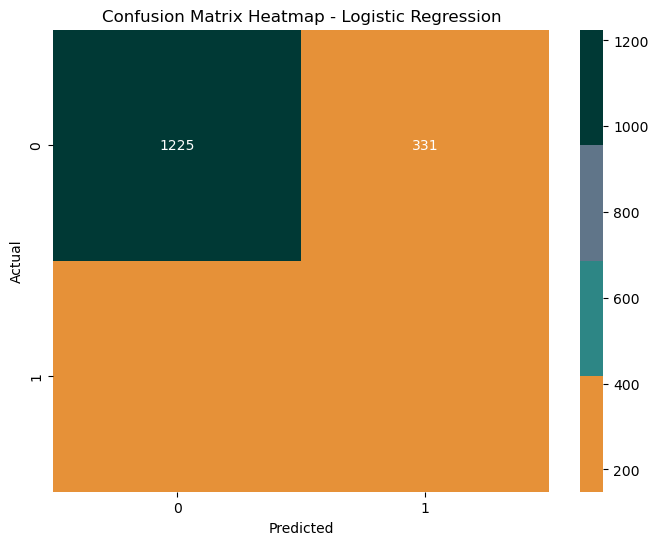

--- SGD Classifier ---
Confusion Matrix:
 [[1146  410]
 [ 118  433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.81      1556
           1       0.51      0.79      0.62       551

    accuracy                           0.75      2107
   macro avg       0.71      0.76      0.72      2107
weighted avg       0.80      0.75      0.76      2107



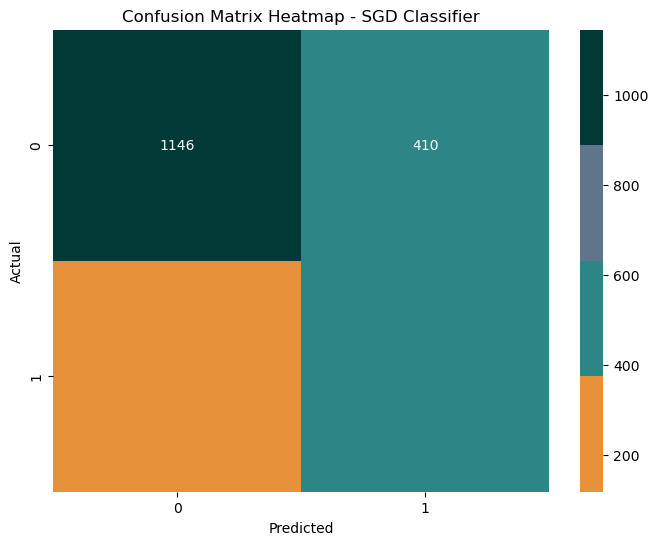

--- Decision Tree Classifier ---
Confusion Matrix:
 [[1264  292]
 [ 283  268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1556
           1       0.48      0.49      0.48       551

    accuracy                           0.73      2107
   macro avg       0.65      0.65      0.65      2107
weighted avg       0.73      0.73      0.73      2107



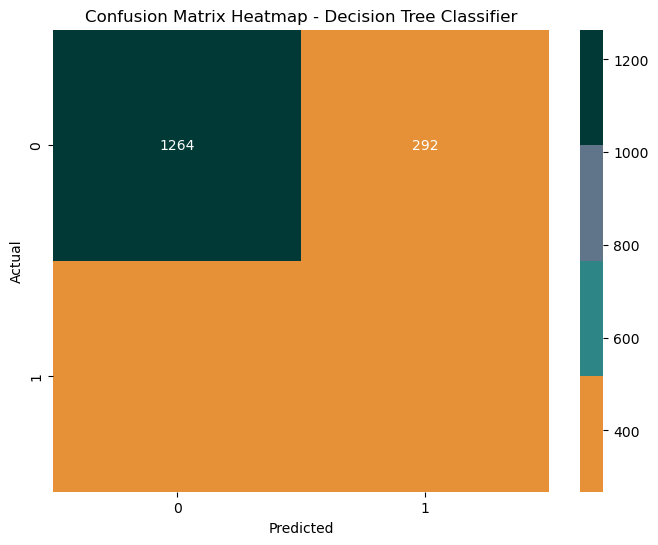

--- Random Forest Classifier ---
Confusion Matrix:
 [[1405  151]
 [ 293  258]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1556
           1       0.63      0.47      0.54       551

    accuracy                           0.79      2107
   macro avg       0.73      0.69      0.70      2107
weighted avg       0.78      0.79      0.78      2107



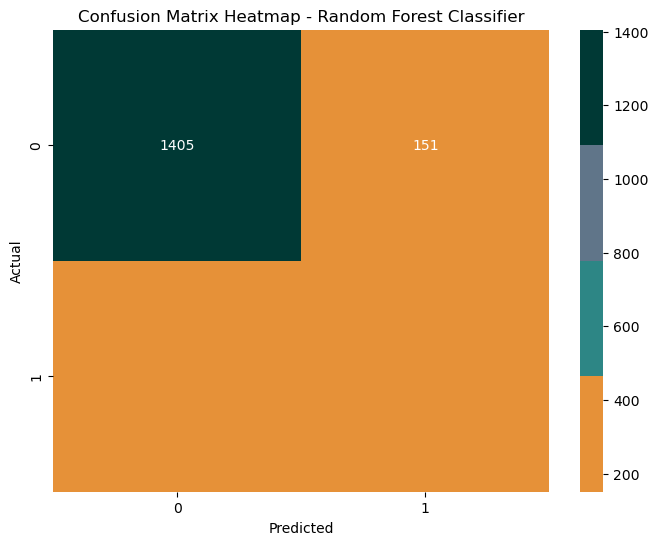

In [467]:
for classifier in Classifiers:  
    model = classifier[0]  
    model_name = classifier[1]  

    model.fit(X_train_scaled, y_train)  
    y_pred = model.predict(X_test_scaled)  

    print(f"--- {model_name} ---")  
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))  
    print('\nClassification Report:\n', classification_report(y_test, y_pred))  

    # Calculate the confusion matrix  
    cm = confusion_matrix(y_test, y_pred)  

    # Create a heatmap using Seaborn with the specified color map  
    plt.figure(figsize=(8, 6))  
    sns.heatmap(cm, annot=True,  fmt='d',cmap=['#e69138', '#2d8685','#607589', '#003935'])   
    plt.xlabel('Predicted')  
    plt.ylabel('Actual')  
    plt.title(f'Confusion Matrix Heatmap - {model_name}')  
    plt.show()

In [ ]:

#Observations on Classifier Performance
#Logistic Regression:

#Confusion Matrix: The confusion matrix will indicate how many true positives, true negatives, false positives, and false negatives were recorded. A higher number of true positives and true negatives compared to false positives and false negatives will generally indicate good model performance.
#Classification Report: The report will provide precision, recall, F1-score, and support for both classes (0 and 1). The model is expected to perform well if it balances precision and recall effectively.
#SGD Classifier:

#Confusion Matrix: This might show a tendency to classify the majority class (if imbalanced). Look for the number of false negatives to assess this.
#Classification Report: The results may differ significantly from the Logistic Regression due to the different nature of the optimization process. It's important to monitor if it can achieve competitive recall metrics for the minority class.

#Decision Tree Classifier:
#Confusion Matrix: Decision trees can overfit the training data, leading to a reduction in generalization to unseen data. The confusion matrix will help determine if the model can generalize well.

#Classification Report: Expect potentially high precision and recall for the majority class, but check for signs of overfitting, particularly if the support for the minority class is low.
#Random Forest Classifier.

In [ ]:
#Best Model Evaluation

In [469]:
for classifier in Classifiers:
    model = classifier[0]
    model_name = classifier[1]

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    result['Model'].append(model_name)
    result['Accuracy'].append(accuracy)
    result['Precision'].append(precision)
    result['Recall'].append(recall)
    result['F1-Score'].append(f1)

# Create a DataFrame from the results
results_df = pd.DataFrame(result)

# Print the results DataFrame
print(results_df)

# Best model based on a chosen metric (e.g., F1-Score)
best_model_index = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_index, 'Model']
print(f"\nBest Model based on F1-Score: {best_model_name}")


                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.772663   0.549046  0.731397  0.627237
1            SGD Classifier  0.749407   0.513642  0.785844  0.621234
2  Decision Tree Classifier  0.727100   0.478571  0.486388  0.482448
3  Random Forest Classifier  0.789274   0.630807  0.468240  0.537500

Best Model based on F1-Score: Logistic Regression


In [471]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1633       0              0        0           0       1             1   
4083       0              1        1           0      68             1   
1885       1              0        1           1      24             1   
4706       0              0        0           0       1             1   
1615       0              0        1           0      49             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1633              0               0             0                 0  ...   
4083              1               0             1                 0  ...   
1885              0               1             1                 0  ...   
4706              0               0             0                 0  ...   
1615              0               0             0                 0  ...   

      StreamingMovies  InternetService_Fiber optic  InternetService_No  \
1633                0                            0                   0   
4083                1                            1                   0   
1885                1                            0                   0   
4706                0                            0                   0   
1615                0                            0                   1   

      Contract_One year  Contract_Two year  \
1633                  0                  0   
4083                  0                  0   
1885                  0                  0   
4706                  0                  0   
1615                  1                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1633                                      0                               1   
4083                                      0                               1   
1885                                      1                               0   
4706                                      0                               0   
1615                                      0                               0   

      PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  
1633                           0           43.80         43.80  
4083                           0          100.20       6851.65  
1885                           0           70.30       1706.45  
4706                           1           44.45         44.45  
1615                           0           20.05        923.10  

[5 rows x 22 columns]

In [473]:
#Features Selection Important
Classifiers

[[LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight={0: 1, 1: 2}, random_state=42), 'SGD Classifier'],
 [DecisionTreeClassifier(class_weight={0: 1, 1: 2}, random_state=42),
  'Decision Tree Classifier'],
 [RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=42),
  'Random Forest Classifier']]

In [475]:
Classifiers[2] [0]

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, random_state=42)

In [ ]:
importance=Classifiers[2] [0].feature_importances_

In [477]:
X_train.head(2)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1633       0              0        0           0       1             1   
4083       0              1        1           0      68             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
1633              0               0             0                 0  ...   
4083              1               0             1                 0  ...   

      StreamingMovies  InternetService_Fiber optic  InternetService_No  \
1633                0                            0                   0   
4083                1                            1                   0   

      Contract_One year  Contract_Two year  \
1633                  0                  0   
4083                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1633                                      0                               1   
4083                                      0                               1   

      PaymentMethod_Mailed check  MonthlyCharges  TotalCharges  
1633                           0            43.8         43.80  
4083                           0           100.2       6851.65  

[2 rows x 22 columns]

In [479]:
feature_names=X_train.columns
feature_importance_df=pd.DataFrame({'Feature':feature_names, 'Importance':Classifiers[2] [0].feature_importances_})


In [280]:
feature_importance_df

Feature  Importance
0                                  gender    0.025325
1                           SeniorCitizen    0.017747
2                                 Partner    0.020911
3                              Dependents    0.018673
4                                  tenure    0.121812
5                            PhoneService    0.006252
6                           MultipleLines    0.014799
7                          OnlineSecurity    0.019996
8                            OnlineBackup    0.012813
9                        DeviceProtection    0.015666
10                            TechSupport    0.012392
11                            StreamingTV    0.008857
12                        StreamingMovies    0.019999
13            InternetService_Fiber optic    0.046942
14                     InternetService_No    0.009148
15                      Contract_One year    0.088461
16                      Contract_Two year    0.129115
17  PaymentMethod_Credit card (automatic)    0.010234
18         PaymentMethod_Electronic check    0.019071
19             PaymentMethod_Mailed check    0.011589
20                         MonthlyCharges    0.193122
21                           TotalCharges    0.177076

In [481]:
feature_importance_df = feature_importance_df.sort_values(by="Importance",ascending=False)
feature_importance_df

Feature  Importance
20                         MonthlyCharges    0.200351
21                           TotalCharges    0.168672
16                      Contract_Two year    0.129115
4                                  tenure    0.123530
15                      Contract_One year    0.088461
13            InternetService_Fiber optic    0.046942
0                                  gender    0.024653
2                                 Partner    0.022245
12                        StreamingMovies    0.019999
18         PaymentMethod_Electronic check    0.019181
7                          OnlineSecurity    0.018207
3                              Dependents    0.017946
1                           SeniorCitizen    0.017932
9                        DeviceProtection    0.017053
6                           MultipleLines    0.016664
17  PaymentMethod_Credit card (automatic)    0.011564
8                            OnlineBackup    0.011420
10                            TechSupport    0.011284
19             PaymentMethod_Mailed check    0.011057
14                     InternetService_No    0.009148
11                            StreamingTV    0.008325
5                            PhoneService    0.006252

<Axes: xlabel='Importance', ylabel='Feature'>

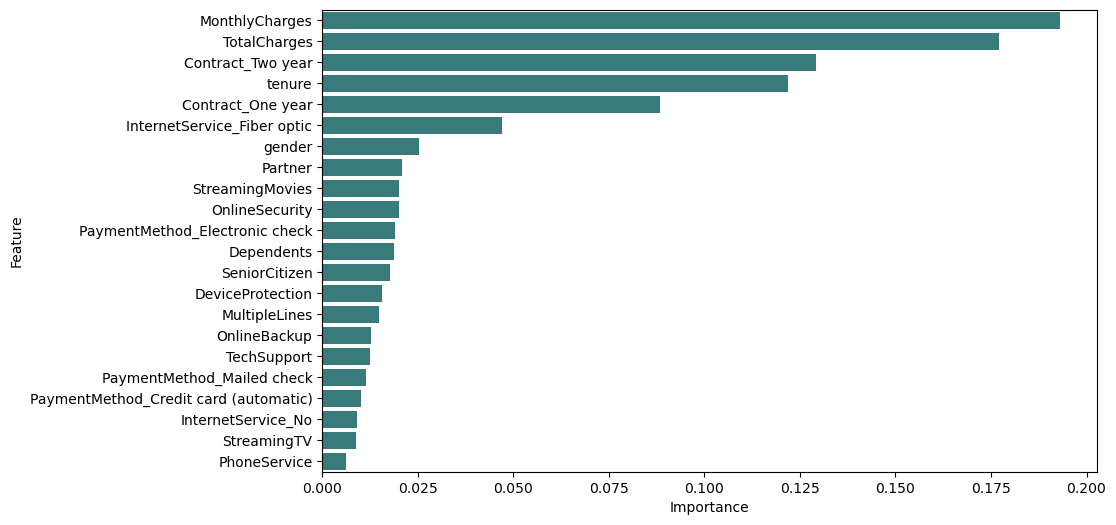

In [284]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_df,x='Importance',y='Feature',color='#2d8685')

In [ ]:
Observations from the Importance Plot:

# - Top Factors: The most important features influencing churn prediction appear to be:
# - TotalCharges: The total amount charged to the customer is a strong indicator, suggesting customers with higher bills might be more prone to churn.
# - MonthlyCharges: Similarly, higher monthly charges also contribute significantly to churn risk.
# - Tenure: Customer tenure plays a crucial role, indicating that newer customers are more likely to churn compared to long-term customers.

# - Contract Type: The importance of 'Contract_Month-to-month' suggests that customers on short-term contracts are more likely to churn, aligning with previous findings.

# - Internet Service: The 'InternetService_Fiber optic' feature indicates that customers with fiber optic internet service might have a higher churn risk, possibly due to factors like pricing or competition.

# - Other Factors: While less impactful than the top features, variables like 'PaymentMethod_Electronic check' and 'OnlineSecurity_No' also contribute to churn prediction. This suggests that payment convenience and security features can influence customer retention.

# Overall: The importance plot provides valuable insights into the key drivers of customer churn. Focusing on addressing these factors, such as offering competitive pricing, long-term contract incentives, and enhanced security features, could help reduce churn rates.


In [286]:
#Top 6 dataframe
Selected_features=feature_importance_df[:6]
Selected_features

Feature  Importance
20               MonthlyCharges    0.193122
21                 TotalCharges    0.177076
16            Contract_Two year    0.129115
4                        tenure    0.121812
15            Contract_One year    0.088461
13  InternetService_Fiber optic    0.046942

In [483]:
Selected_features['Feature'].values

array(['MonthlyCharges', 'TotalCharges', 'Contract_Two year', 'tenure',
       'Contract_One year', 'InternetService_Fiber optic'], dtype=object)

In [485]:
X_train[Selected_features['Feature'].values]

MonthlyCharges  TotalCharges  Contract_Two year  tenure  \
1633           43.80         43.80                  0       1   
4083          100.20       6851.65                  0      68   
1885           70.30       1706.45                  0      24   
4706           44.45         44.45                  0       1   
1615           20.05        923.10                  0      49   
...              ...           ...                ...     ...   
3781           19.10        529.50                  0      29   
5202          111.10       6555.20                  1      59   
5237           54.75       1406.90                  0      26   
5401           20.45        638.55                  1      31   
860            19.80        457.30                  0      26   

      Contract_One year  InternetService_Fiber optic  
1633                  0                            0  
4083                  0                            1  
1885                  0                            0  
4706                  0                            0  
1615                  1                            0  
...                 ...                          ...  
3781                  1                            0  
5202                  0                            1  
5237                  0                            0  
5401                  0                            0  
860                   1                            0  

[4914 rows x 6 columns]

#conclusion

In [ ]:
# 1. Customer Churn Drivers:
# - Tenure: Customers with shorter tenures are more likely to churn. Retention strategies should focus on early engagement and satisfaction.
# - Monthly Charges: Higher monthly charges correlate with increased churn. Offering competitive pricing or value-added services could help retain these customers.
# - Total Charges: While positively correlated with tenure, lower total charges among churned customers suggest potential dissatisfaction with the value received.

# 2. Business Implications:
# - Revenue Loss
# - Increased Customer Acquisition Costs.
# - Negative Impact on Brand Reputation.
# - Missed Opportunities for Upselling and Cross-Selling
# - Reduced Market Share
# - Operational Inefficiencies.

# 3. Future Directions:
# - Explore additional features and data sources to enhance model accuracy based on business benchmarks.
# - Investigate the impact of specific services and promotions on churn based on business needs.
# - Proactive retention strategies targeting high-risk customers (short tenure, high monthly charges) are crucial.
# - Business should focus on early-stage customer engagement and retention strategies.


